In [1]:
#import hangul_font
import warnings
import urllib.request as req
import urllib.parse as par
from konlpy.tag import Okt
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
import nltk
# 한글폰트 사용
plt.rcParams['font.family'] = 'Malgun Gothic' 
mpl.rc('axes', unicode_minus=False)

In [3]:
data1=pd.read_excel("data/se/del_naver_blog_2019.xlsx")
data2=pd.read_excel("data/se/naver_cafe_ssal_contents_2019_전처리완.xlsx")

In [4]:
data1.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471 entries, 0 to 8470
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    8469 non-null   object
 1   date     8470 non-null   object
 2   chat     3998 non-null   object
 3   content  8179 non-null   object
 4   id       8272 non-null   object
dtypes: object(5)
memory usage: 331.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554 entries, 0 to 9553
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     9554 non-null   object
 1   nickname  9554 non-null   object
 2   date      9554 non-null   object
 3   content   9549 non-null   object
 4   comments  9036 non-null   object
dtypes: object(5)
memory usage: 373.3+ KB


In [5]:
d3=pd.concat([data1,data2])
d3=d3[["date","content"]]
d3

,date,content
0,2019.01.29.,":: Pocohol Recipe ::\n우리 아이를 위한 첫 요리, 쌀미음 만들기\..."
1,2019.01.20.,#쌀케이크만들기\n\n\n\n쌀케이크만들기의 기본은\n#제누와즈만들기 !!\n\n#...
2,2019.01.09.,일본식 소고기카레 만드는법 ⓦ. 전남쌀 10kg\n어릴때는 지금도 때때로 ㅋ \n노...
3,2019.01.22.,건강요리 강좌에서 쌀누룩으로 다양한 요리를 만들 수 있는 것을 알고\n호기심과 ...
4,2019.01.27.,"곤약밥\n만드는 법\n#곤약밥\n글, 사진 / 카렌C\n요즘 집에서 식사할 때 먹고..."
...,...,...
9549,2019.12.17,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕
9550,2019.12.13,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다
9551,2019.12.24,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...
9552,2019.12.15,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...


In [8]:
data=d3.dropna(axis=0, how='any', subset = ["content"]) 
data=data.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17728 entries, 0 to 17727
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    17728 non-null  int64 
 1   date     17727 non-null  object
 2   content  17728 non-null  object
dtypes: int64(1), object(2)
memory usage: 415.6+ KB


In [10]:
17728/4

4432.0

In [12]:
datas1=data['content'][:4432]
datas2=data['content'][4432:8864]
datas3=data['content'][8864:13296]
datas4=data['content'][13296:]

In [13]:
datas1 = datas1.reset_index()
datas1

,index,content
0,0,":: Pocohol Recipe ::\n우리 아이를 위한 첫 요리, 쌀미음 만들기\..."
1,1,#쌀케이크만들기\n\n\n\n쌀케이크만들기의 기본은\n#제누와즈만들기 !!\n\n#...
2,2,일본식 소고기카레 만드는법 ⓦ. 전남쌀 10kg\n어릴때는 지금도 때때로 ㅋ \n노...
3,3,건강요리 강좌에서 쌀누룩으로 다양한 요리를 만들 수 있는 것을 알고\n호기심과 ...
4,4,"곤약밥\n만드는 법\n#곤약밥\n글, 사진 / 카렌C\n요즘 집에서 식사할 때 먹고..."
...,...,...
4427,4427,"초기이유식 세번째메뉴 감자미음 만들기 (불린쌀, 냄비 이용)\n초기이유식 감자미음 ..."
4428,4428,중학생 친구들의 쌀계란빵\n맛있는 냄새 솔솔 어릴때먹던 계란빵과는 \n차원이 다른ㅎ...
4429,4429,"- 이화온누리약국, 6・25참전유공자 10명 지원 -\n □ 경남동부보훈지청(지청장..."
4430,4430,"비마이케이크 쌀전병 8종 특강\n\n코코넛, 감태, 피스타치오, 현미, 검은깨, 땅..."


In [14]:
datas2 = datas2.reset_index()
datas2

,index,content
0,4432,16개월 아기간식 추천\n아이배냇 유기농 쌀과자\n쌩마멧 퓨레 \nby 예그리나\n...
1,4433,로니가 6갤부터 지금까지 애정하며\n잘먹고있는 “아이배냇 떡뻥 유기농 쌀과자”\n기...
2,4434,한달에 한번 체험 오는 우리 친구들\n이번에는 더운날씨에 더 맛나게 먹을수 있는 여...
3,4435,안녕하세요~ 오미가미 하니쌤이에요:)\n쌀베이킹\n카페디저트 쌀전병을 \n수업오셨...
4,4436,안녕하세요.\n유자매블로그 입니다 : )\n얼마전에 인터넷에서 빵을 주문했는데\n택...
...,...,...
4427,8859,대형마트에 쌀 배달해 달라 하면 배달해 주나요
4428,8860,떡 만들려고 해요^^혹시 묵은쌀 있으시면 구해봅니다!여기는 탄현이에요~
4429,8861,드디어 내일 출발입니다...휴 이제 실감이 나네요^^이것저것 준비하다 쌀을 사가야...
4430,8862,안녕하세요.묵은 쌀 5-6키로 정도 나눔합니다.혹시 필요하신분 계심 댓글 주세요.삼...


In [15]:
datas3 = datas3.reset_index()
datas3

,index,content
0,8864,작년 말 후곡 올가에서 두박스 샀는데 하나만 쓰고 쌀로 넘어왔네요. 한박스 새거랑 ...
1,8865,찹쌀가루 별로 안써서 좀 들었어요 쌀가루는 별루 안들었어요 내일 오후에 가져가실분용ㅋ
2,8866,안녕하세요~~수제로 만드는쌀디저트~ 쌀식빵 전문점 #라베또 입니다밀가루를 사용하지 ...
3,8867,초기 쌀미음 묽기가 너무 물같으면 안되죠?거의 숭늉맛이던데ㅠㅠㅠㅋㅋㅋ분유농도랑 비슷...
4,8868,방앗간에서 빻아온 쌀가루(소금만준것)냉동실에 소분해서 뒀다가 연습겸 담날 찌려고 냉...
...,...,...
4427,13291,아기가 아플때 쌀미음 해주라해서 샀었는데 3분의1도 못썼네요ㅠㅠ부어서 쓰긴했는데.....
4428,13292,도정 2019년 4월 부터6월 까지 입니다 첨단 2지구 이고 직접 가지러 오셔야 ...
4429,13293,에고..정말 오늘은 쌀가루 소분할려고하는데 시작부터 이상한 시컴둥이들이 많이 껴있어...
4430,13294,지난달에 이천 아울렛갔다가 호두과자사고 계산하는데 사장님이신지 계산해주시면서 쌀주는...


In [16]:
datas4 = datas4.reset_index()
datas4

,index,content
0,13296,둘째 초기이유식 시작하려는데요~뭔가 마음의준비가 제가ㅜ아직 안된듯;;;;초록마을에서...
1,13297,구입해놓고 쌀을 김치냉장고에 보관하다보니필요하지 않아 깨끗히 세척후 지역카페에 저렴...
2,13298,쌀 식빵 처음 만들어 봤는데 1차발효 안하니 훨쉬운 느낌이네요ㅎㅎ
3,13299,쌀가루와 황치즈가루조금넣어 반죽하고 너무 되직해서 생크림남은거 조금 넣고 호두넣구요...
4,13300,초기 이유식 쌀가루인데 스틱포장 5개 남아있어요. 이유식 중기로 넘어가면서 5포가 ...
...,...,...
4427,17723,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕
4428,17724,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다
4429,17725,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...
4430,17726,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...


In [20]:
result_double_list=[]
for i in data.index:
    content=str(data.loc[i,"content"])
    if len(content)>10:
        
        result=[i,content]
        result_double_list.append(result)
    else:
        print(content)
    

이름이 특히한쌀 ㅋ
쌀 파실분 계신가요
오셔야합니다
권선구입니다
농사지은쌀 삽니다.
문자주세요~
 20키로짜리에요 
판매해요~
쌀
쌀 썩어요 ㅠㅠ
쌀이젖었네요ㅜㅜ
정자동입니다~
쌀 항아리 드립니다
신도시 운서동입니다
   
쌀 삽니다
쌀맛있는곳요?
황토쌀단지25000
쌀세일하는곳급함
쌀전업농 입니다.
쌀 니들이나처먹어 
보리~보리~쌀~~
쌀괜찮은건가요?ㅜㅜ
쌀이 떨어졌네요 ㅜ
맛난쌀과자
정상인쌀
    
쌀 사왔네요
쌀 가지고 가요
모현,부송댓챗만원
쌀 휘낭시에입ㄴ당 
쌀 4만원 20키로
쌀있나요?
오늘받은쌀이에요~
쌀가루구해봅니다.
권선동 입니다^^
쌀시몬컵케이크에용
패배자 쌀...
내가좋아하는쌀ㅋㅋ


In [21]:
data=data.reset_index()

In [22]:
result_df=pd.DataFrame(result_double_list,columns=["index","text"])
print(result_df.shape)
result_df

(17689, 2)


,index,text
0,0,":: Pocohol Recipe ::\n우리 아이를 위한 첫 요리, 쌀미음 만들기\..."
1,1,#쌀케이크만들기\n\n\n\n쌀케이크만들기의 기본은\n#제누와즈만들기 !!\n\n#...
2,2,일본식 소고기카레 만드는법 ⓦ. 전남쌀 10kg\n어릴때는 지금도 때때로 ㅋ \n노...
3,3,건강요리 강좌에서 쌀누룩으로 다양한 요리를 만들 수 있는 것을 알고\n호기심과 ...
4,4,"곤약밥\n만드는 법\n#곤약밥\n글, 사진 / 카렌C\n요즘 집에서 식사할 때 먹고..."
...,...,...
17684,17723,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕
17685,17724,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다
17686,17725,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...
17687,17726,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...


In [23]:
result_df.drop_duplicates(inplace=True)
result_df.shape

(17689, 2)

In [24]:
from konlpy.tag import Okt
okt = Okt()

In [25]:
import re
def cleanText(readData):
    text=re.sub("[^(가-힣a-zA-Z0-9. )]", '',readData)
    return text

In [26]:
from tqdm import tqdm
mas_double_list=[]
for text in tqdm(result_df['text']):
    mas_loc=okt.nouns(cleanText(text))
    mas_double_list.append(mas_loc)

100%|██████████| 17689/17689 [08:42<00:00, 33.87it/s]


In [27]:
result_df["mas"]=mas_double_list
result_df.head()

,index,text,mas
0,0,":: Pocohol Recipe ::\n우리 아이를 위한 첫 요리, 쌀미음 만들기\...","[우리, 아이, 위, 첫, 요리, 쌀, 미음, 만들기, 하루, 하루, 기적, 우리,..."
1,1,#쌀케이크만들기\n\n\n\n쌀케이크만들기의 기본은\n#제누와즈만들기 !!\n\n#...,"[쌀, 케이크, 만들기, 쌀, 케이크, 만들기, 기본, 누, 만들기, 누, 저, 경..."
2,2,일본식 소고기카레 만드는법 ⓦ. 전남쌀 10kg\n어릴때는 지금도 때때로 ㅋ \n노...,"[일본, 소고기, 카레, 법, 전남, 쌀, 때, 지금, 뚜기, 카레, 향신료, 냄새..."
3,3,건강요리 강좌에서 쌀누룩으로 다양한 요리를 만들 수 있는 것을 알고\n호기심과 ...,"[건강, 요리, 강좌, 쌀, 누룩, 요리, 수, 것, 알, 호기심, 보고, 마음, ..."
4,4,"곤약밥\n만드는 법\n#곤약밥\n글, 사진 / 카렌C\n요즘 집에서 식사할 때 먹고...","[곤약, 밥, 법, 곤약, 밥글, 사진, 카렌, 요즘, 집, 식사, 때, 곤약, 밥..."


In [28]:
st = ['천원', '꼭걸', '먹이', '그날', '삭제', '키', '정말', '입', '만', '포스팅', '약간', '정보', 
'말', '어제', '옵션', '아래', '분', '처음', '개', '년', '혹시', '사람', '시', '추천', '쌀', '애', '저희', '로', '이용',
 '판매', '체', '가요', '사', '번호', '이제', '나', '을', '경우', '오늘', '아주', '진짜', '모두', '자동', '날', '시골', '는', '손', 
 '생각', '질문', '연락', '살', '역시', '센치', '구입', '끼', '용', '사실', '것', '배', '위', '요즘', '다른', '지금', '불', '시작', 
 '다시', '우리', '은', '사랑', '거', '킹', '제품', '등', '조금', '내', '이후', '앞', '줄', '단계', '이번', '직접', '이', '재생',
  '좀', '미니', '봉', '가', '맘', '월', '듯', '중', '저', '신분', '첫', '미리', '더', '사용', '여기', '농사', '요', '한번', '작성', 
  '게시', '주문', '어디', '농', '산', '개월', '거의', '안', '를', '완전', '제', '및', '실', '글', '원', '다음', '위해', '곳', '그냥',
   '구매', '초기', '준비', '도', '계속', '때', '유통', '살짝', '먹기', '후', '나눔', '때모두', '댓글', '알', '규정', '정도', '점', 
   '스푼', '얼마', '화질', '일', '못', '마을', '만원', '아시', '하루', '걸', '전', '바로', '수', '또', '중기', '번', '먼저', '달', 
   '기', '건', '반', '구', '숟가락', '사진', '선택', '사서', '호', '완성', '가지', '뭐', '가장', '내일', '공지', '때문', '방법', 
   '보고', '이상', '끝', '하나', '해', '사항', '한국', '그', '습', '꼭', '왜', '떡뻥',
   "보시","함","총","몇","뭘","등등","장","옆","담","길","보","주","초","볼","게","해도",'보통',"데","식",'초',"똑","포","로만","해먹","온","하니","늘","틀","속","명","뒤",
"단", "여", "지은","바","막",'쪽',"뭘","총","약","낼"]

In [29]:
q = " "
for i in range(len(datas1)):
    try:
        q += data['content'][i]+" "
    except:
        pass
    
nouns = okt.nouns(q)
nouns2=nouns
nouns2_copy=nouns.copy()

In [30]:
q = " "
for i in range(len(datas2)):
    try:
        q += data['content'][i]+" "
    except:
        pass
    
nouns_2 = okt.nouns(q)
nouns2_2=nouns_2
nouns2_copy_2=nouns_2.copy()

In [31]:
q = " "
for i in range(len(datas3)):
    try:
        q += data['content'][i]+" "
    except:
        pass
    
nouns_3 = okt.nouns(q)
nouns2_3=nouns_3
nouns2_copy_3=nouns_3.copy()

In [32]:
q = " "
for i in range(len(datas4)):
    try:
        q += data['content'][i]+" "
    except:
        pass
    
nouns_4 = okt.nouns(q)
nouns2_4=nouns_4
nouns2_copy_4=nouns_4.copy()

In [33]:
noun_sum = nouns2 + nouns2_2 + nouns2_3 + nouns2_4

In [34]:
noun_sum_1=noun_sum
noun_sum_2=noun_sum
nouns_sum_copy=noun_sum.copy()

In [35]:
r=[]

for i in noun_sum_2 :
    if i =="아가":
        t=i.replace("아가","아이")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r



r=[]

for i in noun_sum_2 :
    if i =="아기":
        t=i.replace("아기","아이")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r


r=[]

for i in noun_sum_2 :
    if i =="애기":
        t=i.replace("애기","아이")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r


r=[]

for i in noun_sum_2 :
    if i =="베이":
        t=i.replace("베이","베이킹")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r

r=[]
for i in noun_sum_2 :
    if i =="쌀벌레":
        t=i.replace("쌀벌레","벌레")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r

r=[]
for i in noun_sum_2 :
    if i =="벌래":
        t=i.replace("벌래","벌레")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r

r=[]
for i in noun_sum_2 :
    if i =="쌀벌래":
        t=i.replace("쌀벌래","벌레")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r

r=[]
for i in noun_sum_2 :
    if i =="바구미":
        t=i.replace("바구미","벌레")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r


r=[]
for i in noun_sum_2 :
    if i =="기한":
        t=i.replace("기한","유통기한")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r


r=[]
for i in noun_sum_2 :
    if i =="배송":
        t=i.replace("배송","배달")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r


r=[]
for i in noun_sum_2 :
    if i =="택배":
        t=i.replace("택배","배달")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r



r=[]
for i in noun_sum_2 :
    if i =="박력":
        t=i.replace("박력","박력분")
        r.append(t)
    else:
       r.append(i) 
noun_sum_2=r



In [36]:
count = Counter(nouns2_copy)

count

# remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})
remove_char_counter = Counter(
    {x: count[x] for x in count if x not in st})

print(remove_char_counter)

Counter({'맛': 7079, '밥': 6303, '이유식': 6247, '가루': 5549, '물': 4761, '과자': 4489, '미음': 3156, '아이': 2922, '곤약': 2876, '아기': 2743, '떡': 2360, '간식': 2255, '집': 2215, '빵': 2214, '재료': 2206, '유기농': 2138, '현미': 2064, '시간': 1966, '케이크': 1871, '포장': 1825, '보관': 1782, '수업': 1708, '만들기': 1543, '엄마': 1516, '다이어트': 1462, '선물': 1329, '베이': 1304, '떡볶이': 1300, '느낌': 1289, '찹쌀': 1278, '가격': 1257, '피자': 1200, '밀가루': 1182, '향': 1153, '소고기': 1149, '치즈': 1134, '백미': 1118, '건강': 1059, '야채': 1053, '식감': 1020, '양': 1009, '반죽': 996, '떡국': 995, '마음': 994, '음식': 988, '종류': 933, '메뉴': 921, '쿠키': 894, '냄비': 852, '모양': 851, '카페': 839, '일반': 836, '크림': 823, '강정': 819, '고로케': 815, '설탕': 811, '감자': 797, '단호박': 795, '막걸리': 794, '용기': 791, '국내': 780, '핫도그': 778, '식품': 773, '도정': 764, '소스': 757, '아침': 756, '치킨': 752, '식빵': 750, '무': 735, '밥맛': 733, '맛집': 719, '디저트': 705, '고구마': 702, '클래스': 702, '후기': 696, '초코': 686, '박스': 676, '누룽지': 674, '냉동': 673, '레시피': 672, '칼로리': 669, '발효': 661, '바삭': 653, '쌀밥': 650, '문의': 648, '요리':

In [37]:
count = Counter(remove_char_counter).most_common()
count

[('맛', 7079),
 ('밥', 6303),
 ('이유식', 6247),
 ('가루', 5549),
 ('물', 4761),
 ('과자', 4489),
 ('미음', 3156),
 ('아이', 2922),
 ('곤약', 2876),
 ('아기', 2743),
 ('떡', 2360),
 ('간식', 2255),
 ('집', 2215),
 ('빵', 2214),
 ('재료', 2206),
 ('유기농', 2138),
 ('현미', 2064),
 ('시간', 1966),
 ('케이크', 1871),
 ('포장', 1825),
 ('보관', 1782),
 ('수업', 1708),
 ('만들기', 1543),
 ('엄마', 1516),
 ('다이어트', 1462),
 ('선물', 1329),
 ('베이', 1304),
 ('떡볶이', 1300),
 ('느낌', 1289),
 ('찹쌀', 1278),
 ('가격', 1257),
 ('피자', 1200),
 ('밀가루', 1182),
 ('향', 1153),
 ('소고기', 1149),
 ('치즈', 1134),
 ('백미', 1118),
 ('건강', 1059),
 ('야채', 1053),
 ('식감', 1020),
 ('양', 1009),
 ('반죽', 996),
 ('떡국', 995),
 ('마음', 994),
 ('음식', 988),
 ('종류', 933),
 ('메뉴', 921),
 ('쿠키', 894),
 ('냄비', 852),
 ('모양', 851),
 ('카페', 839),
 ('일반', 836),
 ('크림', 823),
 ('강정', 819),
 ('고로케', 815),
 ('설탕', 811),
 ('감자', 797),
 ('단호박', 795),
 ('막걸리', 794),
 ('용기', 791),
 ('국내', 780),
 ('핫도그', 778),
 ('식품', 773),
 ('도정', 764),
 ('소스', 757),
 ('아침', 756),
 ('치킨', 752),
 ('식빵', 750),
 (

In [38]:
mas_counts=Counter(remove_char_counter)
data_barh=pd.DataFrame(mas_counts.most_common(50),
columns=["word","counts"])
data_barh.head()

,word,counts
0,맛,7079
1,밥,6303
2,이유식,6247
3,가루,5549
4,물,4761


In [39]:
min_count=100
word_list=[]
for word,count in count:
    if count>min_count:
        word_list.append(word)
        

In [40]:
print(len(word_list))
word_list

1153


['맛',
 '밥',
 '이유식',
 '가루',
 '물',
 '과자',
 '미음',
 '아이',
 '곤약',
 '아기',
 '떡',
 '간식',
 '집',
 '빵',
 '재료',
 '유기농',
 '현미',
 '시간',
 '케이크',
 '포장',
 '보관',
 '수업',
 '만들기',
 '엄마',
 '다이어트',
 '선물',
 '베이',
 '떡볶이',
 '느낌',
 '찹쌀',
 '가격',
 '피자',
 '밀가루',
 '향',
 '소고기',
 '치즈',
 '백미',
 '건강',
 '야채',
 '식감',
 '양',
 '반죽',
 '떡국',
 '마음',
 '음식',
 '종류',
 '메뉴',
 '쿠키',
 '냄비',
 '모양',
 '카페',
 '일반',
 '크림',
 '강정',
 '고로케',
 '설탕',
 '감자',
 '단호박',
 '막걸리',
 '용기',
 '국내',
 '핫도그',
 '식품',
 '도정',
 '소스',
 '아침',
 '치킨',
 '식빵',
 '무',
 '밥맛',
 '맛집',
 '디저트',
 '고구마',
 '클래스',
 '후기',
 '초코',
 '박스',
 '누룽지',
 '냉동',
 '레시피',
 '칼로리',
 '발효',
 '바삭',
 '쌀밥',
 '문의',
 '요리',
 '쌀국수',
 '라이스',
 '부분',
 '우유',
 '냄새',
 '면',
 '국물',
 '친구',
 '대신',
 '그릇',
 '스틱',
 '걱정',
 '고민',
 '라면',
 '봉지',
 '과일',
 '통',
 '식사',
 '추가',
 '소개',
 '버터',
 '진행',
 '이유',
 '일단',
 '딸기',
 '비',
 '이건',
 '컵',
 '상품',
 '더욱',
 '보기',
 '생산',
 '도움',
 '지역',
 '의',
 '법',
 '저녁',
 '육수',
 '조리',
 '튀김',
 '그대로',
 '눈',
 '모습',
 '몸',
 '확인',
 '브로콜리',
 '세트',
 '가족',
 '평소',
 '층',
 '색',
 '조청',
 '앙금',
 '조절',
 '소금',
 '중간',
 

In [41]:
CHANGE_WORDS_SET=[['아가', '아이'],
 ['아기', '아이'],
 ['애기', '아이'],
 ['베이', '베이킹'],
 ['쌀벌레', '벌레'],
 ['벌래', '벌레'],
 ['쌀벌래', '벌레'],
 ['바구미', '벌레'],
 ['기한', '유통기한'],
 ['배송', '배달'],
 ['택배', '배달'],
 ['박력', '박력분']]

In [42]:
result_df

,index,text,mas
0,0,":: Pocohol Recipe ::\n우리 아이를 위한 첫 요리, 쌀미음 만들기\...","[우리, 아이, 위, 첫, 요리, 쌀, 미음, 만들기, 하루, 하루, 기적, 우리,..."
1,1,#쌀케이크만들기\n\n\n\n쌀케이크만들기의 기본은\n#제누와즈만들기 !!\n\n#...,"[쌀, 케이크, 만들기, 쌀, 케이크, 만들기, 기본, 누, 만들기, 누, 저, 경..."
2,2,일본식 소고기카레 만드는법 ⓦ. 전남쌀 10kg\n어릴때는 지금도 때때로 ㅋ \n노...,"[일본, 소고기, 카레, 법, 전남, 쌀, 때, 지금, 뚜기, 카레, 향신료, 냄새..."
3,3,건강요리 강좌에서 쌀누룩으로 다양한 요리를 만들 수 있는 것을 알고\n호기심과 ...,"[건강, 요리, 강좌, 쌀, 누룩, 요리, 수, 것, 알, 호기심, 보고, 마음, ..."
4,4,"곤약밥\n만드는 법\n#곤약밥\n글, 사진 / 카렌C\n요즘 집에서 식사할 때 먹고...","[곤약, 밥, 법, 곤약, 밥글, 사진, 카렌, 요즘, 집, 식사, 때, 곤약, 밥..."
...,...,...,...
17684,17723,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕,"[쌀, 과자, 공부]"
17685,17724,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다,"[저울, 준비, 분유, 스푼, 쌀, 가루, 그램, 초기, 이유식]"
17686,17725,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...,"[오늘, 최저, 정보, 롯데, 백화점, 납품, 쌀, 등급, 상, 개, 구매, 제품,..."
17687,17726,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...,"[쌀, 튀밥, 개, 유통, 기한, 어그, 사이즈, 용감, 검정, 운동화, 사이즈, ..."


In [43]:
mas_double_list=[]
for mas_loc in result_df["mas"]:
    mas_sptd=mas_loc
    mas_list=[]
    for mas in mas_sptd:
        if mas not in st and mas in word_list:
            for cw in CHANGE_WORDS_SET:
                if cw[0]==mas:
                    mas==cw[1]
            mas_list.append(mas)
    mas_double_list.append(mas_list)


In [44]:
len(mas_double_list)

17689

In [45]:
from gensim import corpora
from gensim import models

In [46]:
dictionary=corpora.Dictionary(mas_double_list)

In [47]:
corpus=[]
for mas_loc in mas_double_list:
    term_vect=dictionary.doc2bow(mas_loc)
    corpus.append(term_vect)

In [50]:
from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 50;
    start = 2;
    step = 2;

    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.grid(True)
    plt.show()

    for m, cv in zip(x, coherence_values):
        print("Num Topics =", m, " has Coherence value of", round(cv, 4))


C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
dictionary.filter_extremes(no_below=100)
corpus = [dictionary.doc2bow(text) for text in (mas_double_list)]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of unique tokens: 1082
Number of documents: 17689


C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2021-08-26 18:09:41,526 : INFO : using symmetric alpha at 0.5
2021-08-26 18:09:41,527 : INFO : using symmetric eta at 0.5
2021-08-26 18:09:41,528 : INFO : using serial LDA version on this node
2021-08-26 18:09:41,530 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 17689 documents, updating model once every 2000 documents, evaluating perplexity every 17689 documents, iterating 50x with a convergence threshold of 0.001000
2021-08-26 18:09:41,532 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021

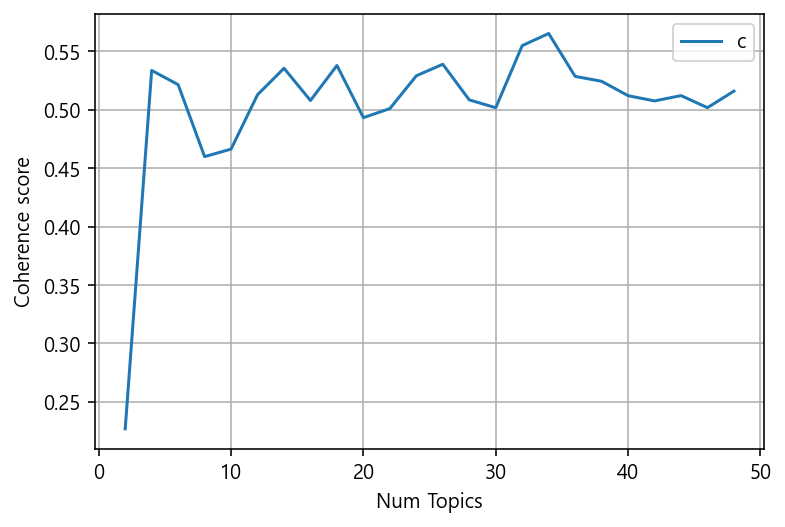

Num Topics = 2  has Coherence value of 0.2268
Num Topics = 4  has Coherence value of 0.5337
Num Topics = 6  has Coherence value of 0.5215
Num Topics = 8  has Coherence value of 0.4599
Num Topics = 10  has Coherence value of 0.4663
Num Topics = 12  has Coherence value of 0.5129
Num Topics = 14  has Coherence value of 0.5355
Num Topics = 16  has Coherence value of 0.5079
Num Topics = 18  has Coherence value of 0.5379
Num Topics = 20  has Coherence value of 0.4932
Num Topics = 22  has Coherence value of 0.501
Num Topics = 24  has Coherence value of 0.5291
Num Topics = 26  has Coherence value of 0.5389
Num Topics = 28  has Coherence value of 0.5084
Num Topics = 30  has Coherence value of 0.5017
Num Topics = 32  has Coherence value of 0.5549
Num Topics = 34  has Coherence value of 0.5653
Num Topics = 36  has Coherence value of 0.5285
Num Topics = 38  has Coherence value of 0.5244
Num Topics = 40  has Coherence value of 0.512
Num Topics = 42  has Coherence value of 0.5075
Num Topics = 44  ha

In [52]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


find_optimal_number_of_topics(dictionary, corpus, mas_double_list)

In [53]:
import pyLDAvis

import pyLDAvis.gensim_models as gensimvis
# k = 12

# #  모델 생성
# lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations = 12, num_topics = k, id2word = dictionary , passes = 1, workers = 10)

# # 분석 결과 확인 
# print(lda_model.print_topics(num_topics = k, num_words = 15))



# prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
# pyLDAvis.save_html(prepared_data, 'LDA.html')
# pyLDAvis.display(prepared_data)

C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell') 
coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell')


C:\Users\CPB06GameN\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=18, passes=10, callbacks=[coherence_logger, perplexity_logger])

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

    # Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=mas_double_list, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (c_v): ', coherence_lda)

    # Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=mas_double_list, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (u_mass): ', coherence_lda)

2021-08-26 19:53:08,546 : INFO : using symmetric alpha at 0.05555555555555555
2021-08-26 19:53:08,548 : INFO : using symmetric eta at 0.05555555555555555
2021-08-26 19:53:08,549 : INFO : using serial LDA version on this node
2021-08-26 19:53:08,553 : INFO : running online (multi-pass) LDA training, 18 topics, 10 passes over the supplied corpus of 17689 documents, updating model once every 2000 documents, evaluating perplexity every 17689 documents, iterating 50x with a convergence threshold of 0.001000
2021-08-26 19:53:08,554 : INFO : PROGRESS: pass 0, at document #2000/17689
2021-08-26 19:53:09,728 : INFO : merging changes from 2000 documents into a model of 17689 documents
2021-08-26 19:53:09,729 : INFO : topic #17 (0.056): 0.034*"맛" + 0.029*"곤약" + 0.028*"피자" + 0.013*"밥" + 0.012*"빵" + 0.011*"베이" + 0.010*"케이크" + 0.008*"앙금" + 0.008*"멸치" + 0.008*"고로케"
2021-08-26 19:53:09,729 : INFO : topic #5 (0.056): 0.064*"과자" + 0.031*"맛" + 0.025*"아기" + 0.016*"피자" + 0.013*"아이" + 0.013*"간식" + 0.011*"쌀국

(0, '0.147*"가루" + 0.044*"반죽" + 0.032*"핫도그" + 0.023*"레시피" + 0.023*"설탕"')
(1, '0.182*"빵" + 0.056*"카스테라" + 0.032*"빵집" + 0.028*"쌀빵" + 0.026*"이웃"')
(2, '0.220*"떡" + 0.108*"떡볶이" + 0.046*"떡국" + 0.034*"방앗간" + 0.029*"떡집"')
(3, '0.157*"케이크" + 0.035*"디저트" + 0.030*"앙금" + 0.028*"다쿠아즈" + 0.024*"딸기"')
(4, '0.127*"곤약" + 0.102*"밥" + 0.076*"다이어트" + 0.028*"칼로리" + 0.027*"탄수화물"')
(5, '0.104*"맛" + 0.040*"아이" + 0.033*"간식" + 0.018*"라이스" + 0.017*"쌀국수"')
(6, '0.180*"현미" + 0.059*"누룽지" + 0.052*"백미" + 0.032*"쌀눈" + 0.031*"잡곡"')
(7, '0.119*"식빵" + 0.054*"조청" + 0.034*"요리" + 0.029*"비건" + 0.026*"재료"')
(8, '0.135*"이유식" + 0.104*"가루" + 0.072*"미음" + 0.037*"물" + 0.021*"소고기"')
(9, '0.117*"보관" + 0.039*"벌레" + 0.033*"통" + 0.024*"냉동" + 0.024*"냉장"')
(10, '0.168*"밥" + 0.032*"맛" + 0.030*"밥맛" + 0.029*"도정" + 0.025*"햅쌀"')
(11, '0.156*"과자" + 0.081*"아기" + 0.074*"유기농" + 0.039*"아이" + 0.037*"간식"')
(12, '0.080*"수업" + 0.053*"베이" + 0.044*"클래스" + 0.035*"쿠키" + 0.028*"전병"')
(13, '0.039*"맛" + 0.035*"카페" + 0.024*"맛집" + 0.022*"메뉴" + 0.018*"치킨"')
(14

2021-08-26 19:55:03,887 : INFO : 23 batches submitted to accumulate stats from 1472 documents (-31426 virtual)
2021-08-26 19:55:03,909 : INFO : 25 batches submitted to accumulate stats from 1600 documents (-31946 virtual)
2021-08-26 19:55:04,136 : INFO : 32 batches submitted to accumulate stats from 2048 documents (-41817 virtual)
2021-08-26 19:55:04,710 : INFO : 56 batches submitted to accumulate stats from 3584 documents (-76185 virtual)
2021-08-26 19:55:05,772 : INFO : 106 batches submitted to accumulate stats from 6784 documents (-139239 virtual)
2021-08-26 19:55:06,095 : INFO : 117 batches submitted to accumulate stats from 7488 documents (-151627 virtual)
2021-08-26 19:55:07,597 : INFO : 11 accumulators retrieved from output queue
2021-08-26 19:55:07,749 : INFO : accumulated word occurrence stats for 146760 virtual documents



Coherence Score (c_v):  0.5858435899065109


2021-08-26 19:55:08,909 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2021-08-26 19:55:08,931 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2021-08-26 19:55:08,953 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2021-08-26 19:55:08,976 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2021-08-26 19:55:09,000 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2021-08-26 19:55:09,023 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2021-08-26 19:55:09,051 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2021-08-26 19:55:09,077 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2021-08-26 19:55:09,089 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2021-08-26 19:55:09,099 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2021-08-26 19:55:09,106 : INFO : CorpusAccumulator accumulated stats from 11000 documents
2021-08-26 19:55:09


Coherence Score (u_mass):  -2.3297835696519713


In [66]:
prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(prepared_data, 'LDA_2019_18topic.html')
pyLDAvis.display(prepared_data)

In [67]:
from gensim import corpora 
from gensim import models
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
import urllib.request as req
import urllib.parse as par
from konlpy.tag import Okt
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
warnings.filterwarnings(action='ignore')

<Figure size 2160x2160 with 0 Axes>

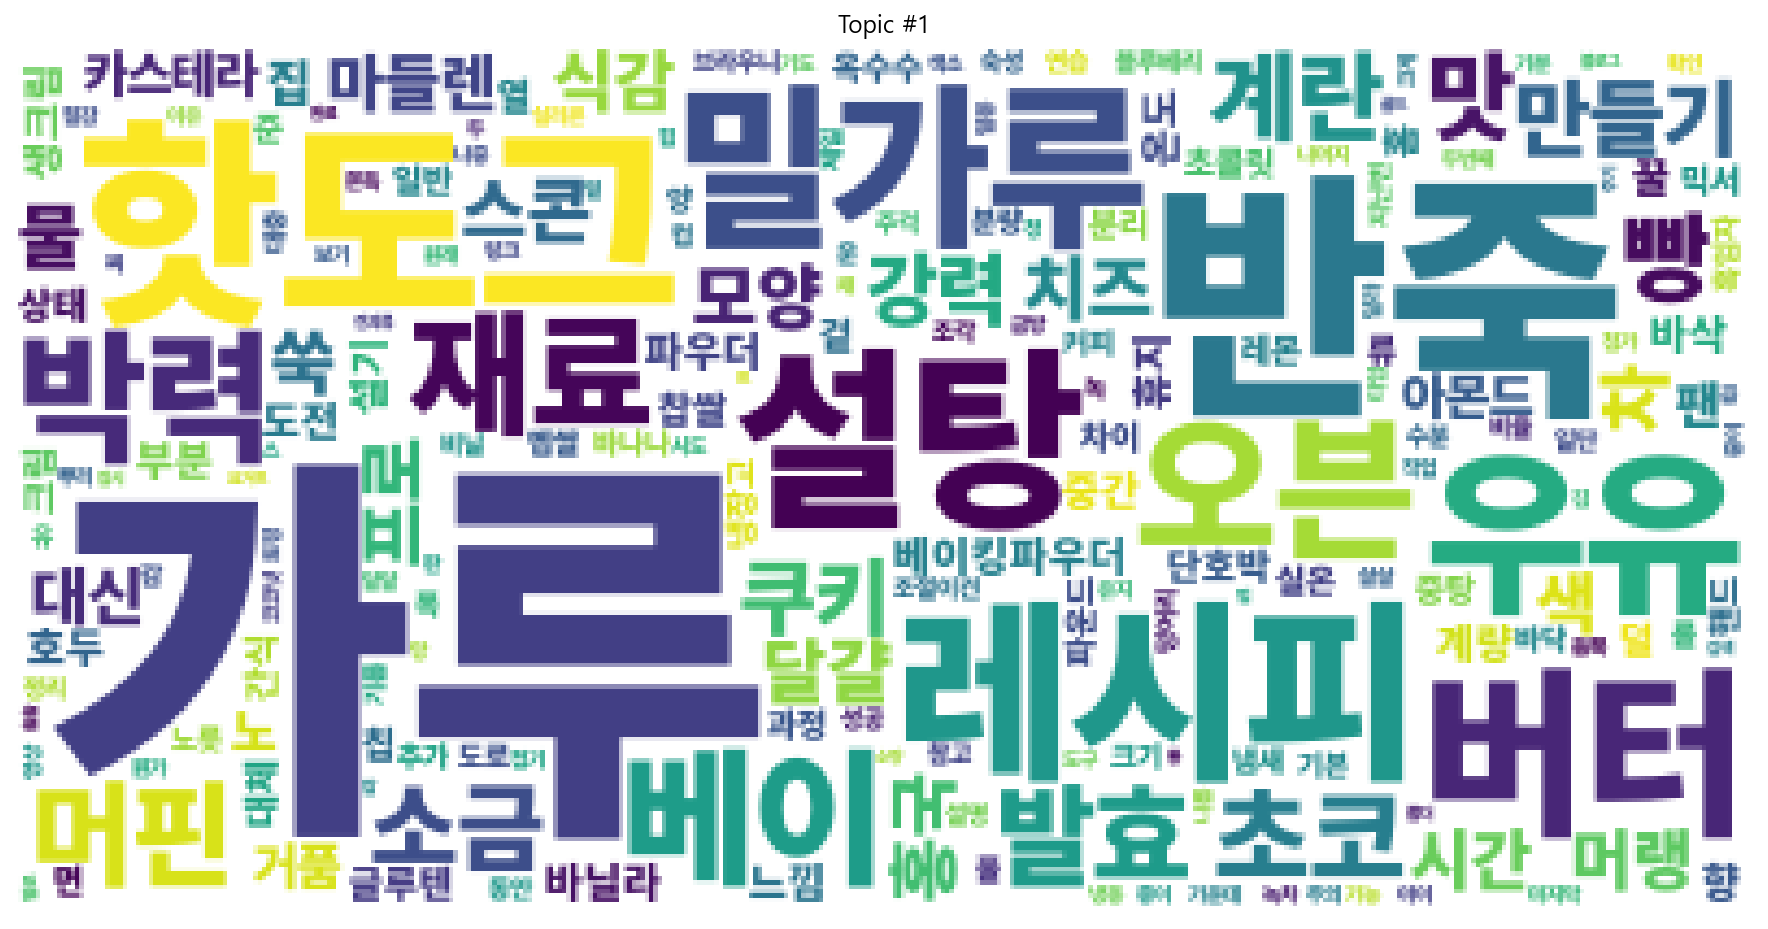

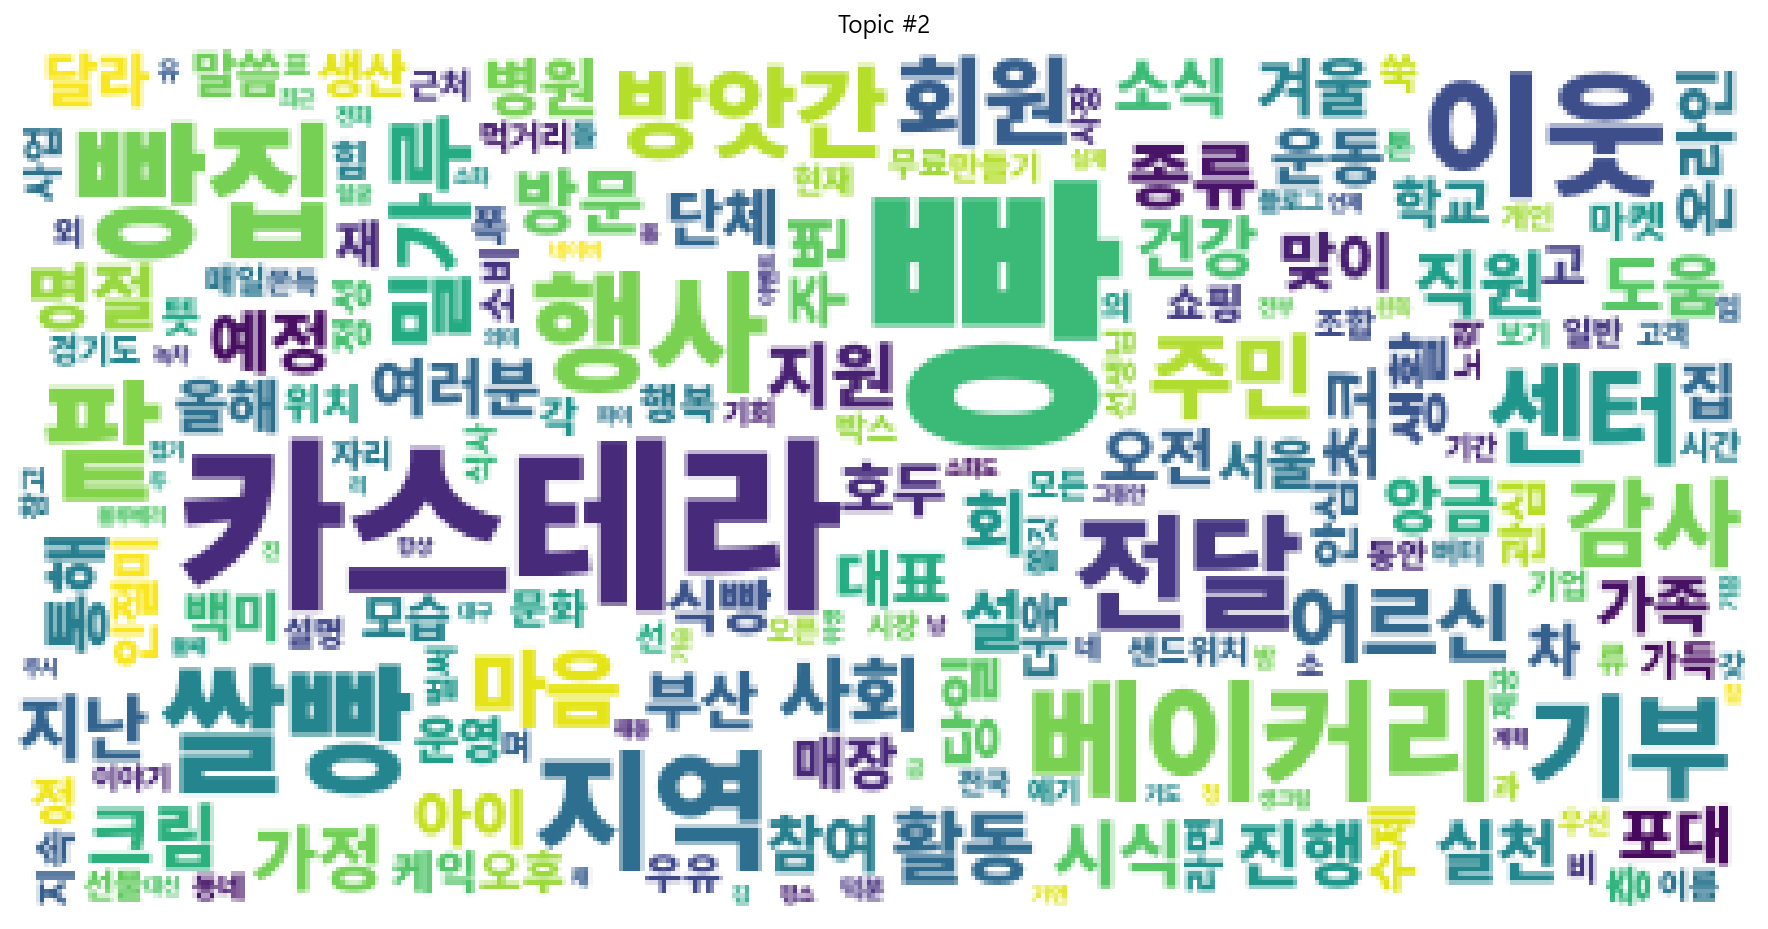

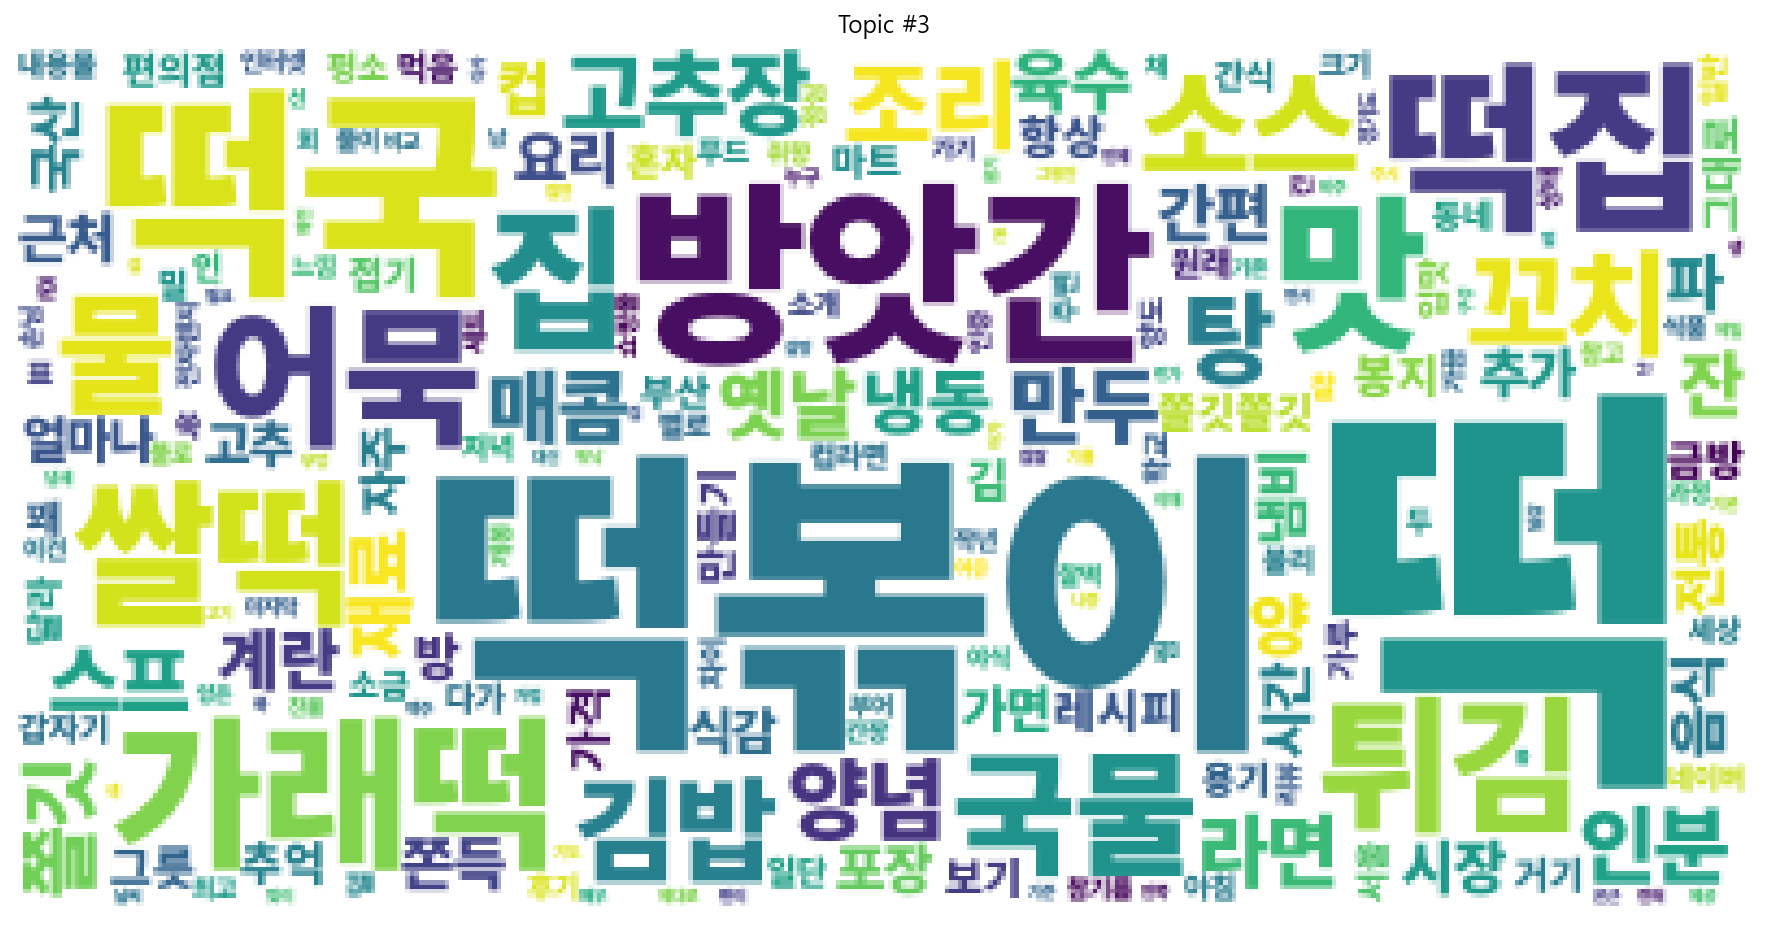

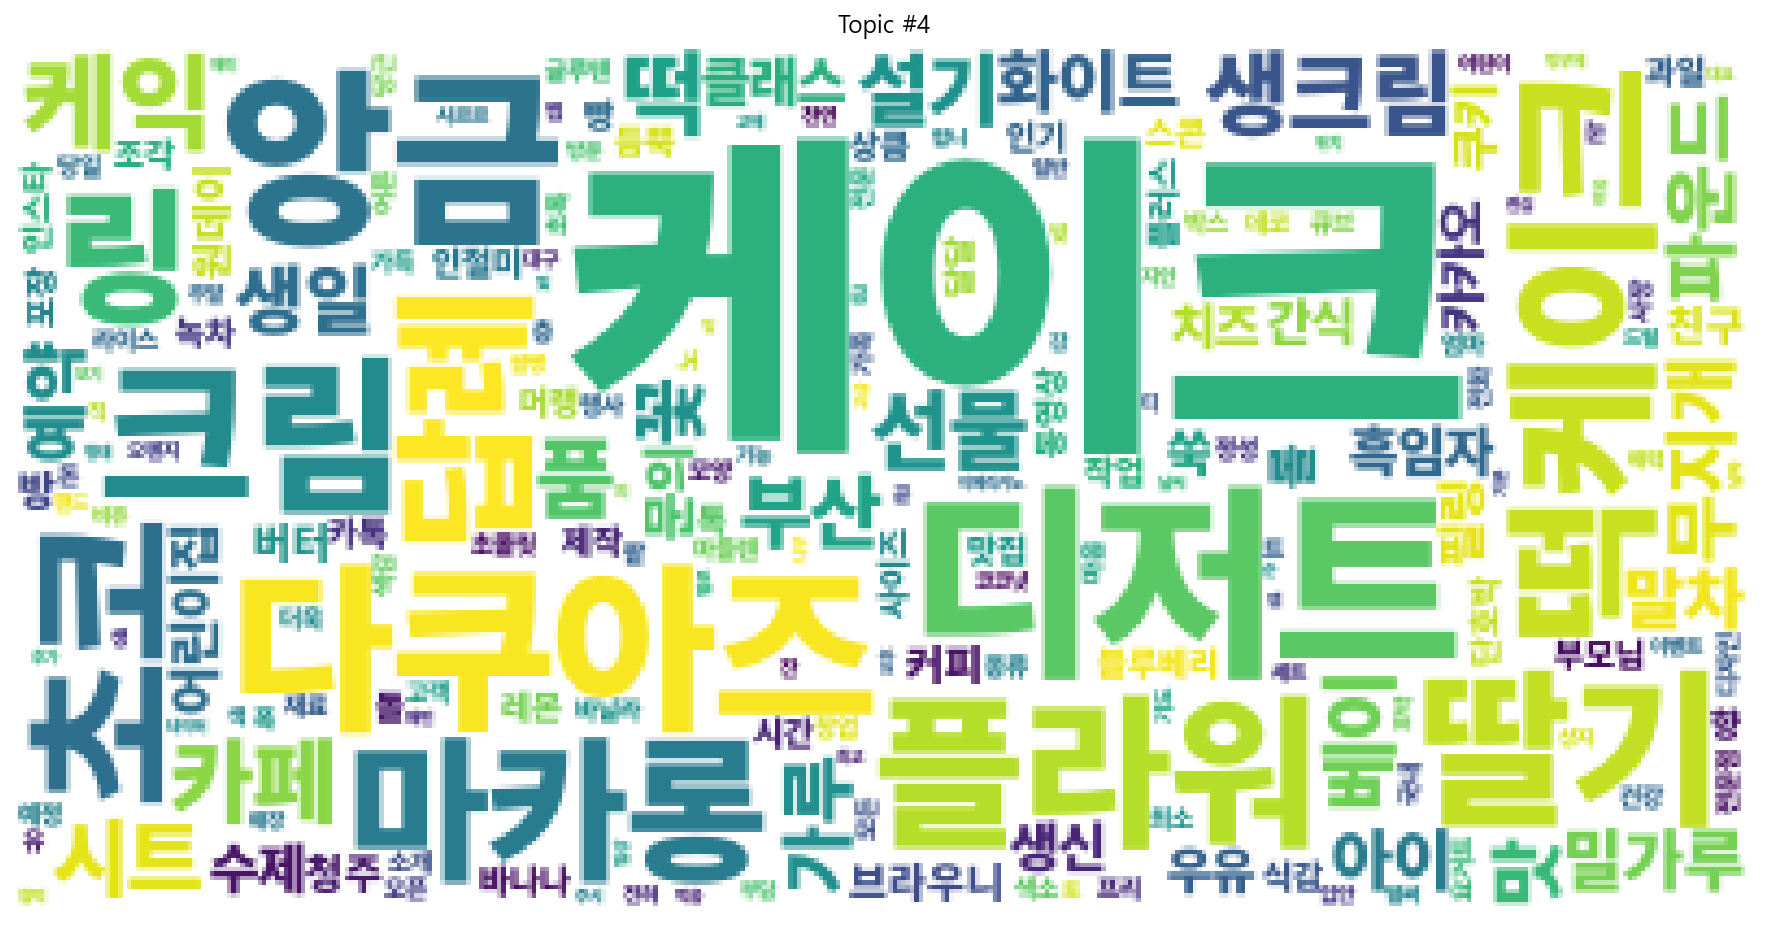

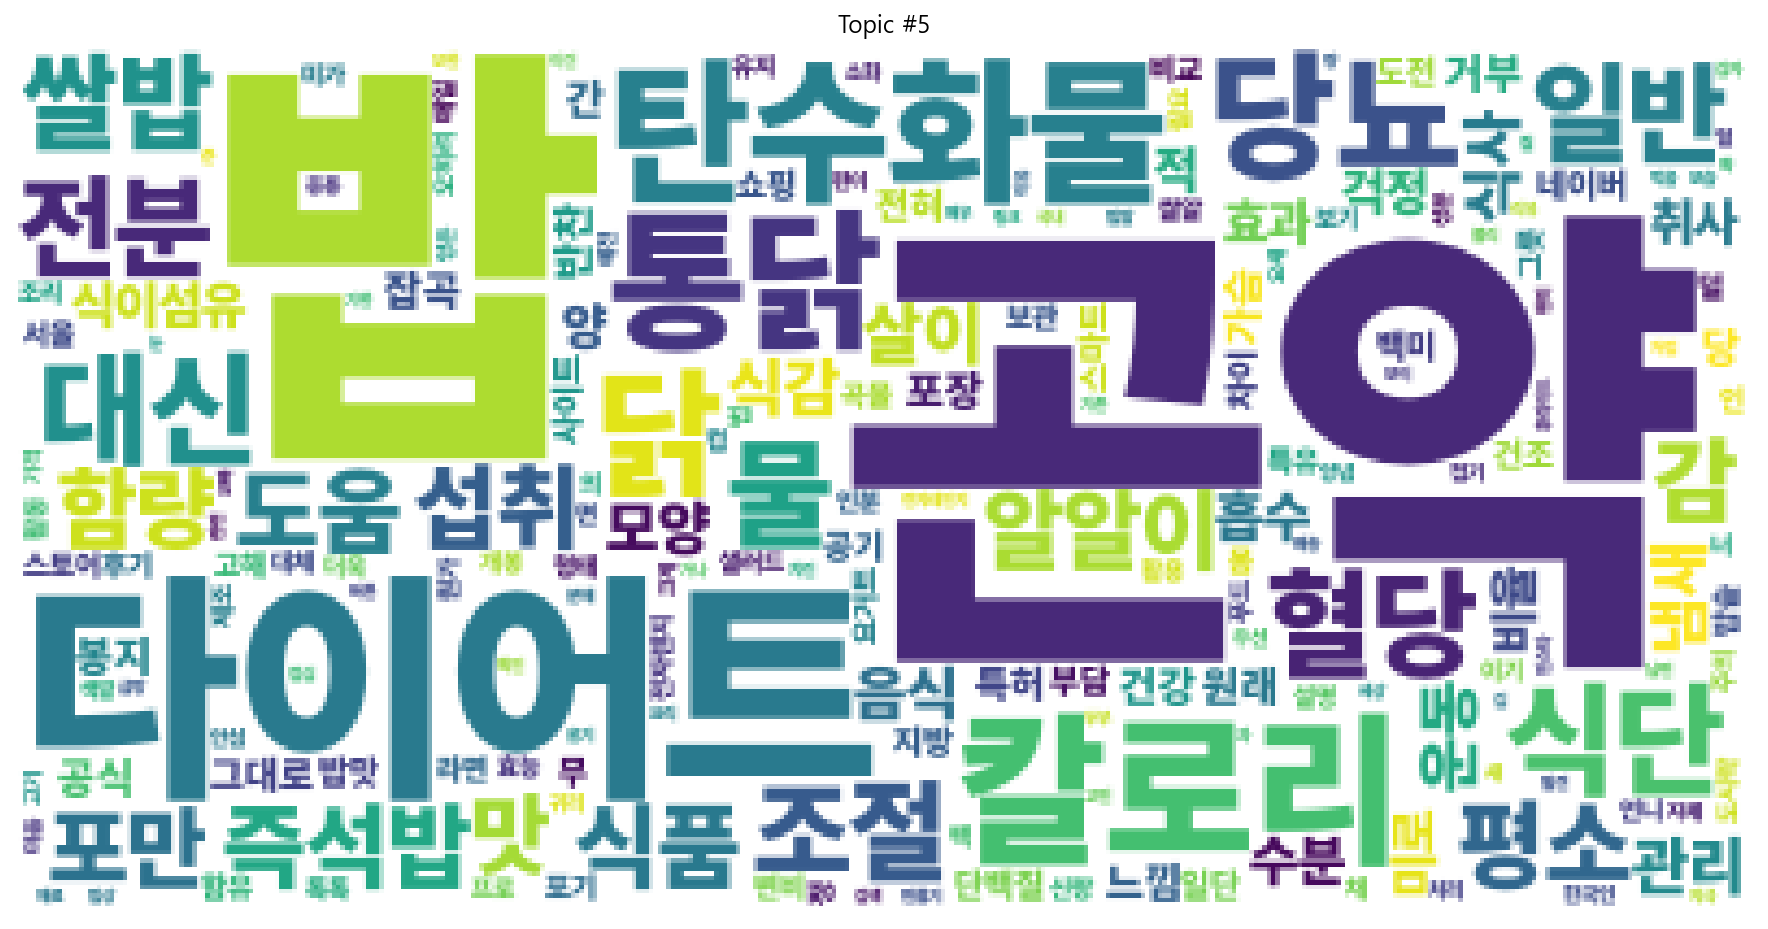

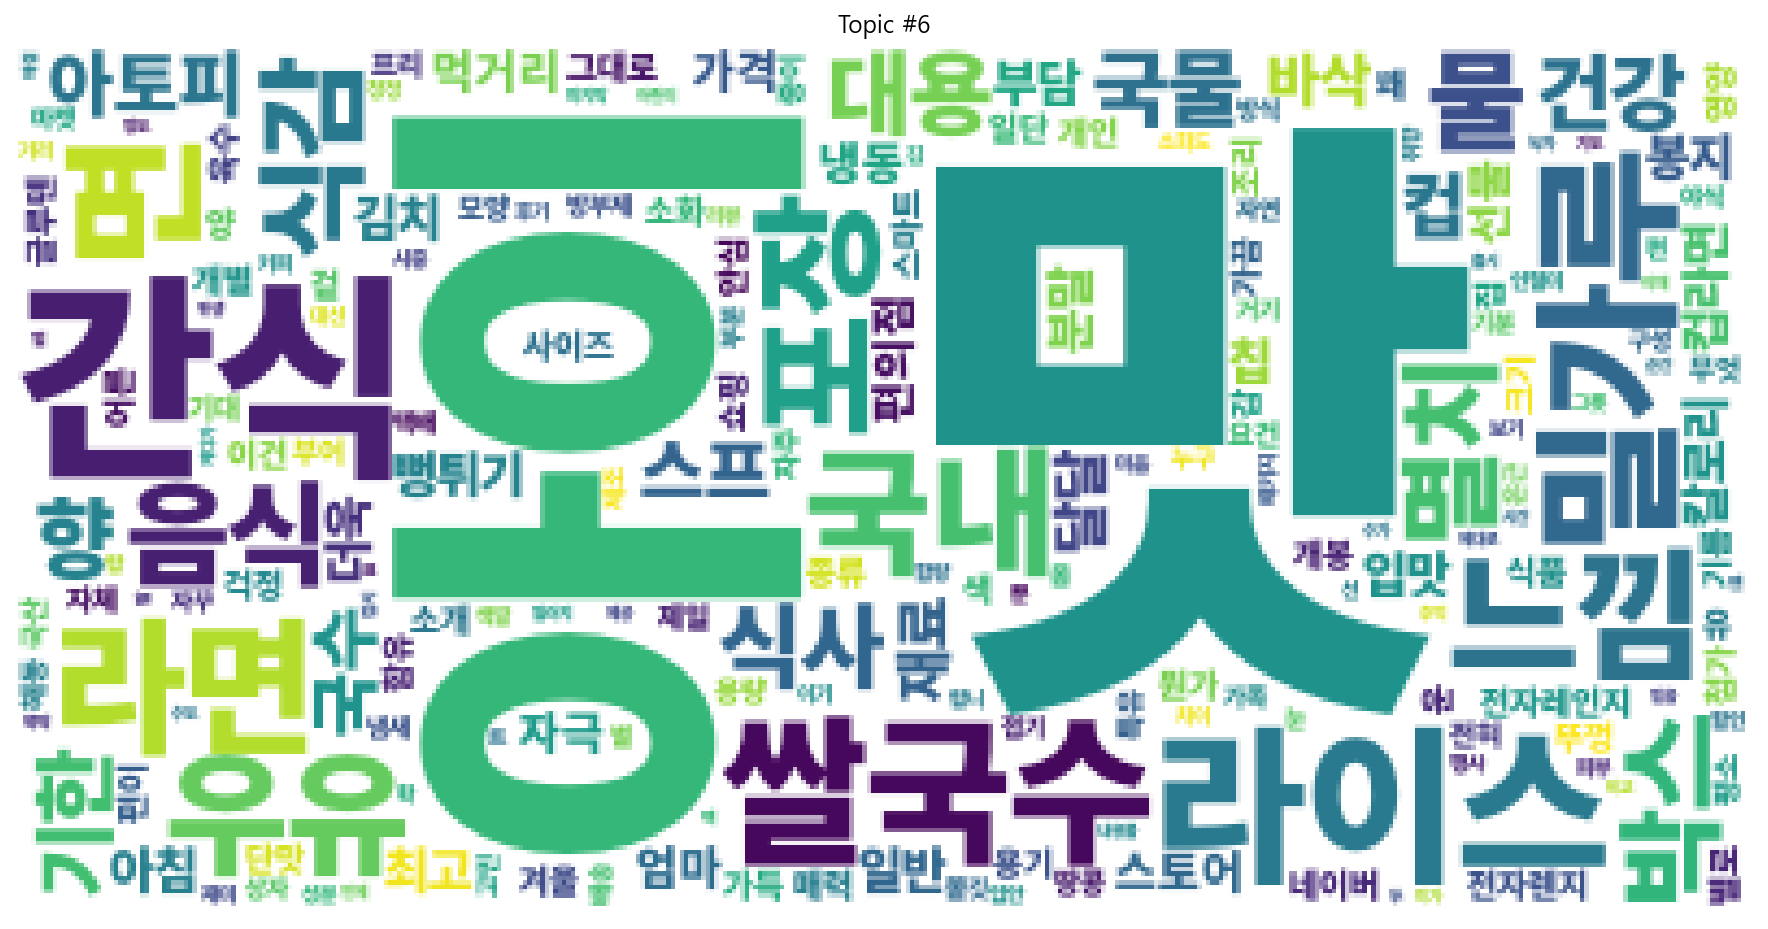

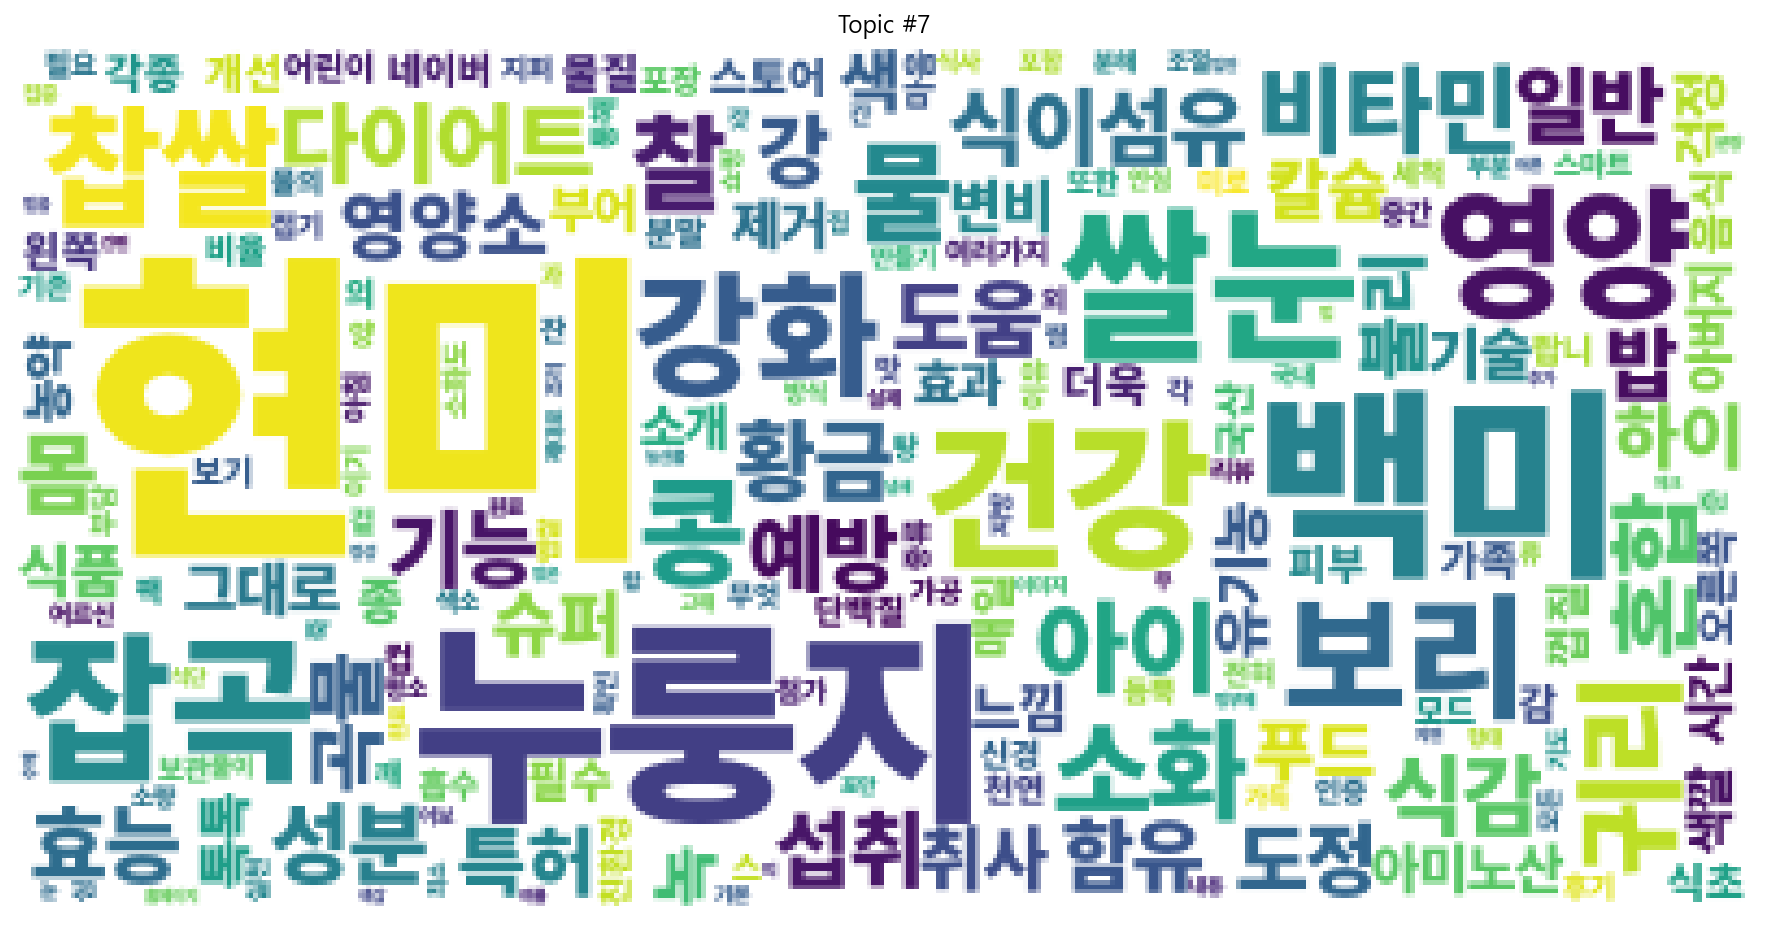

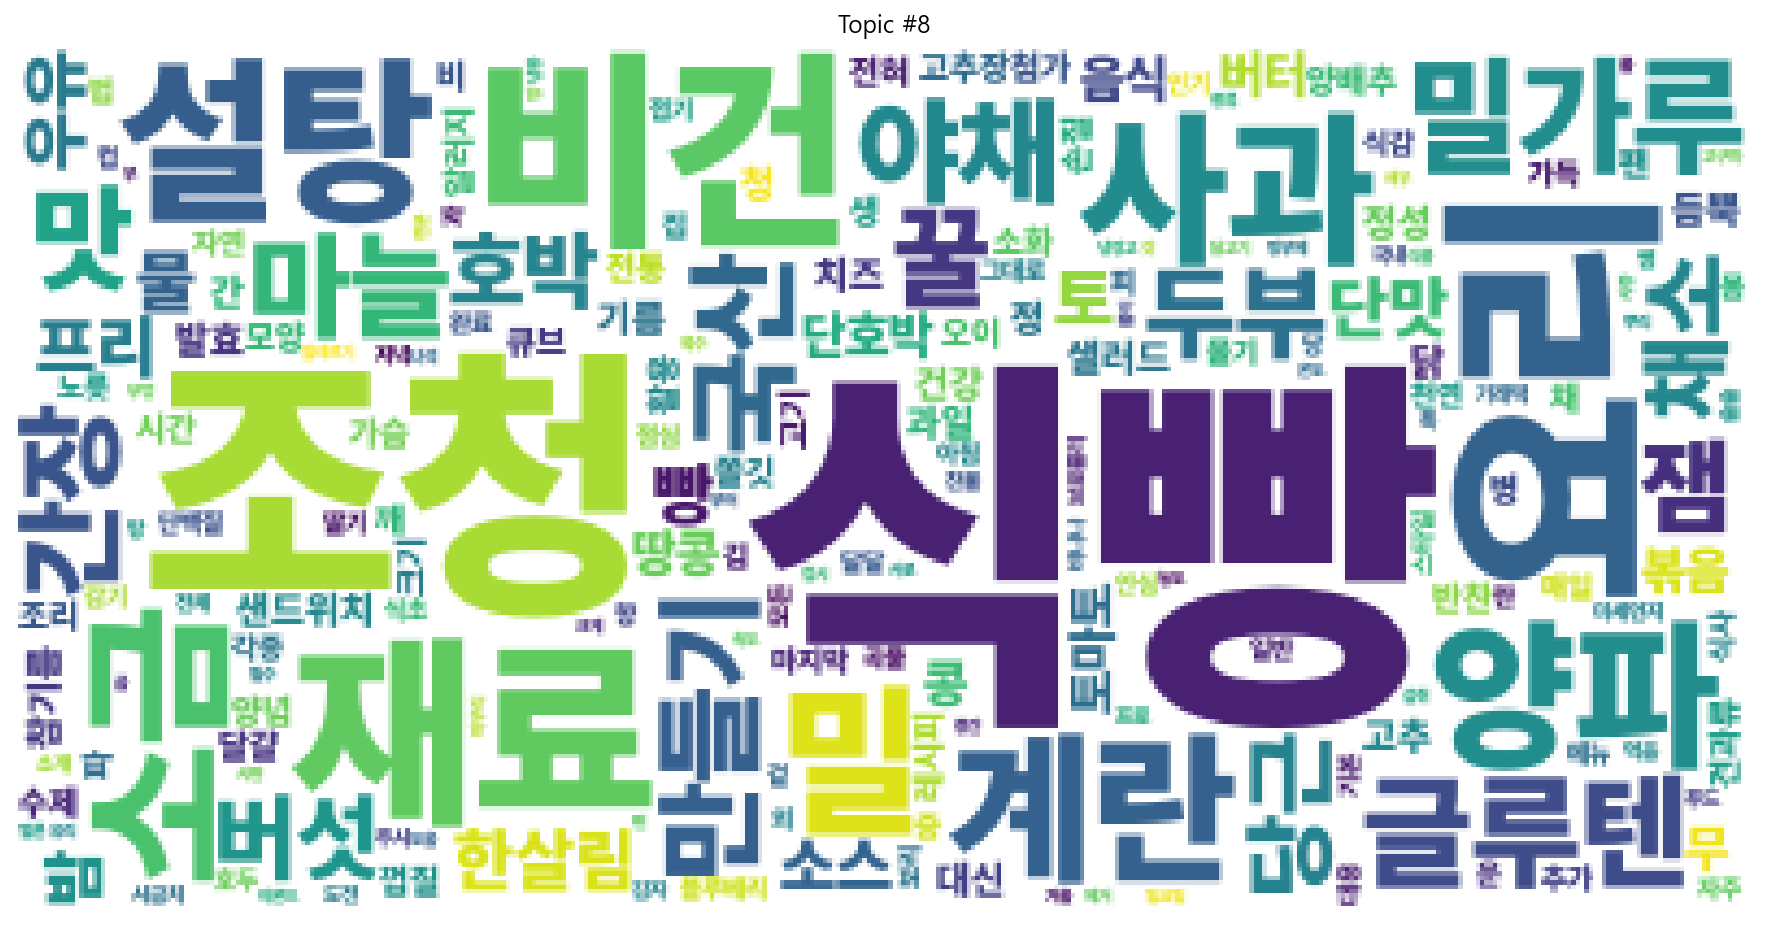

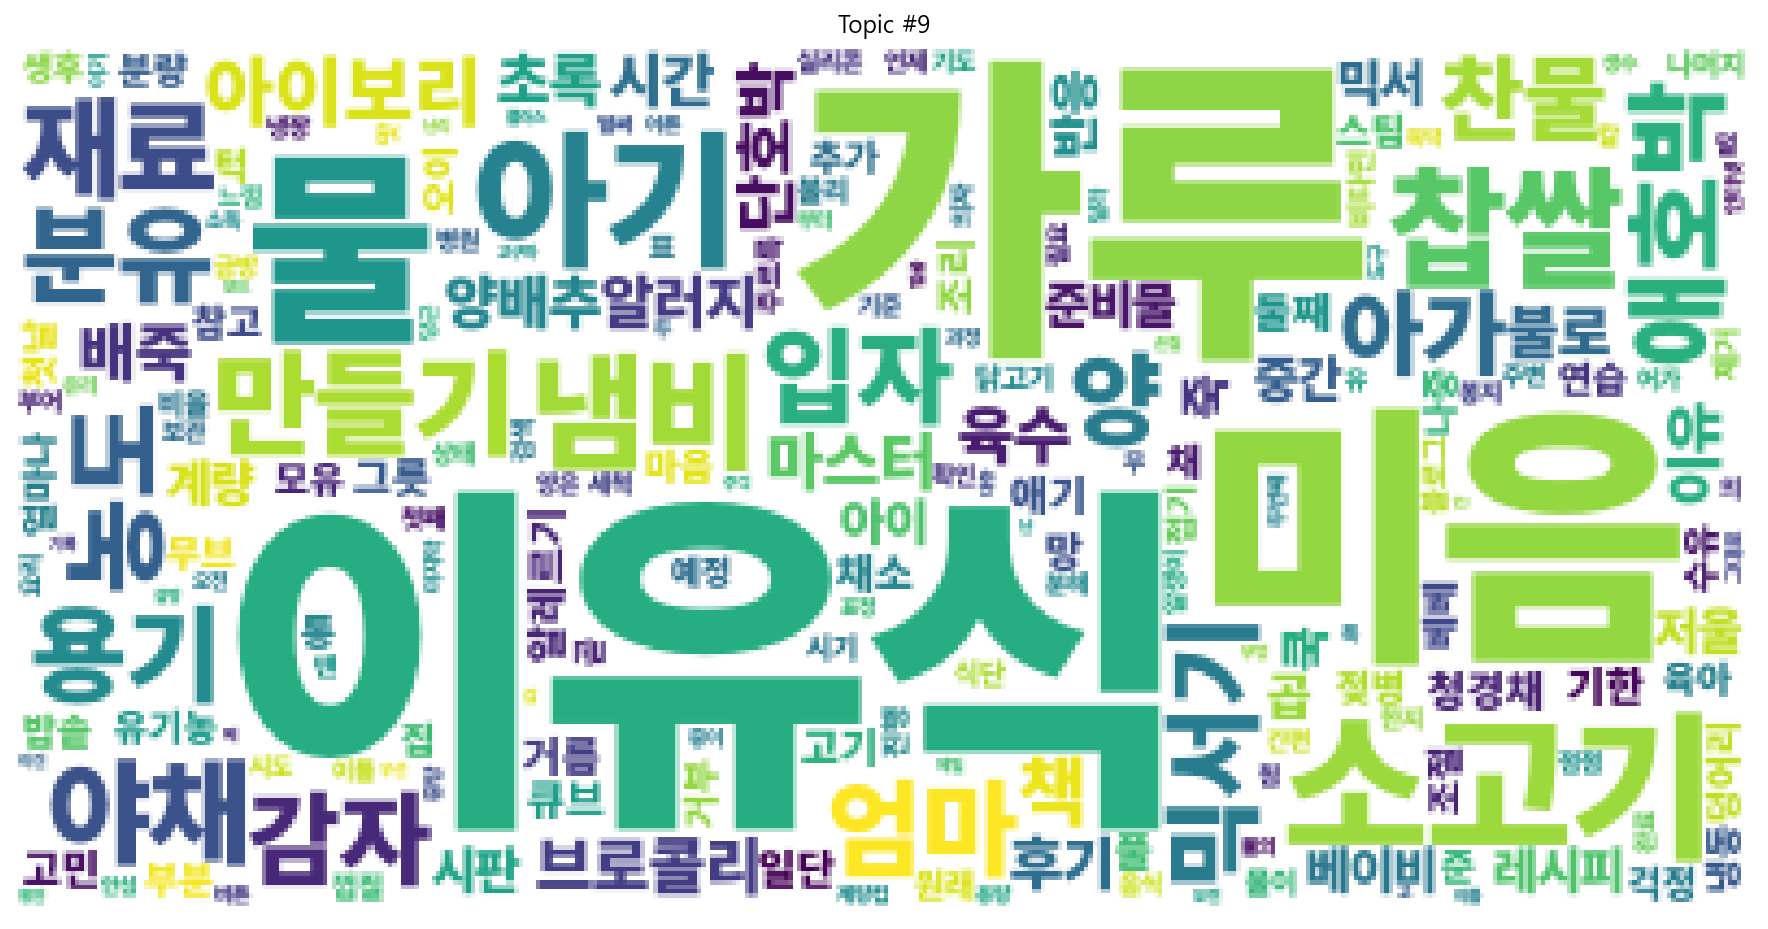

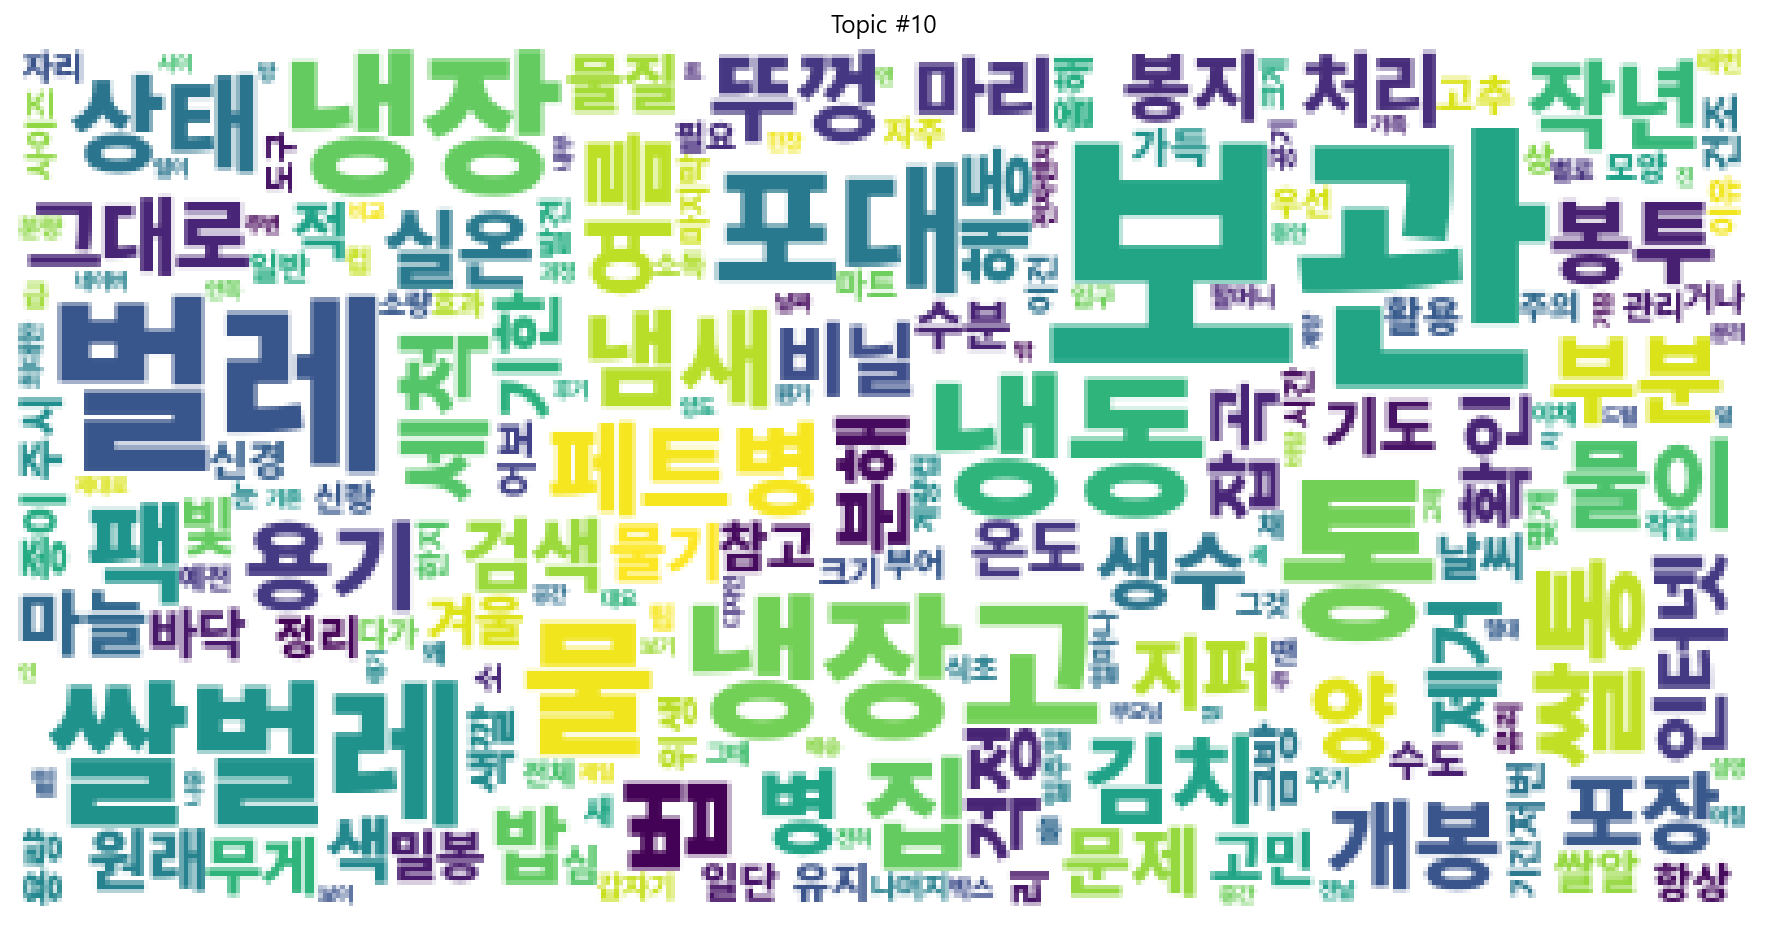

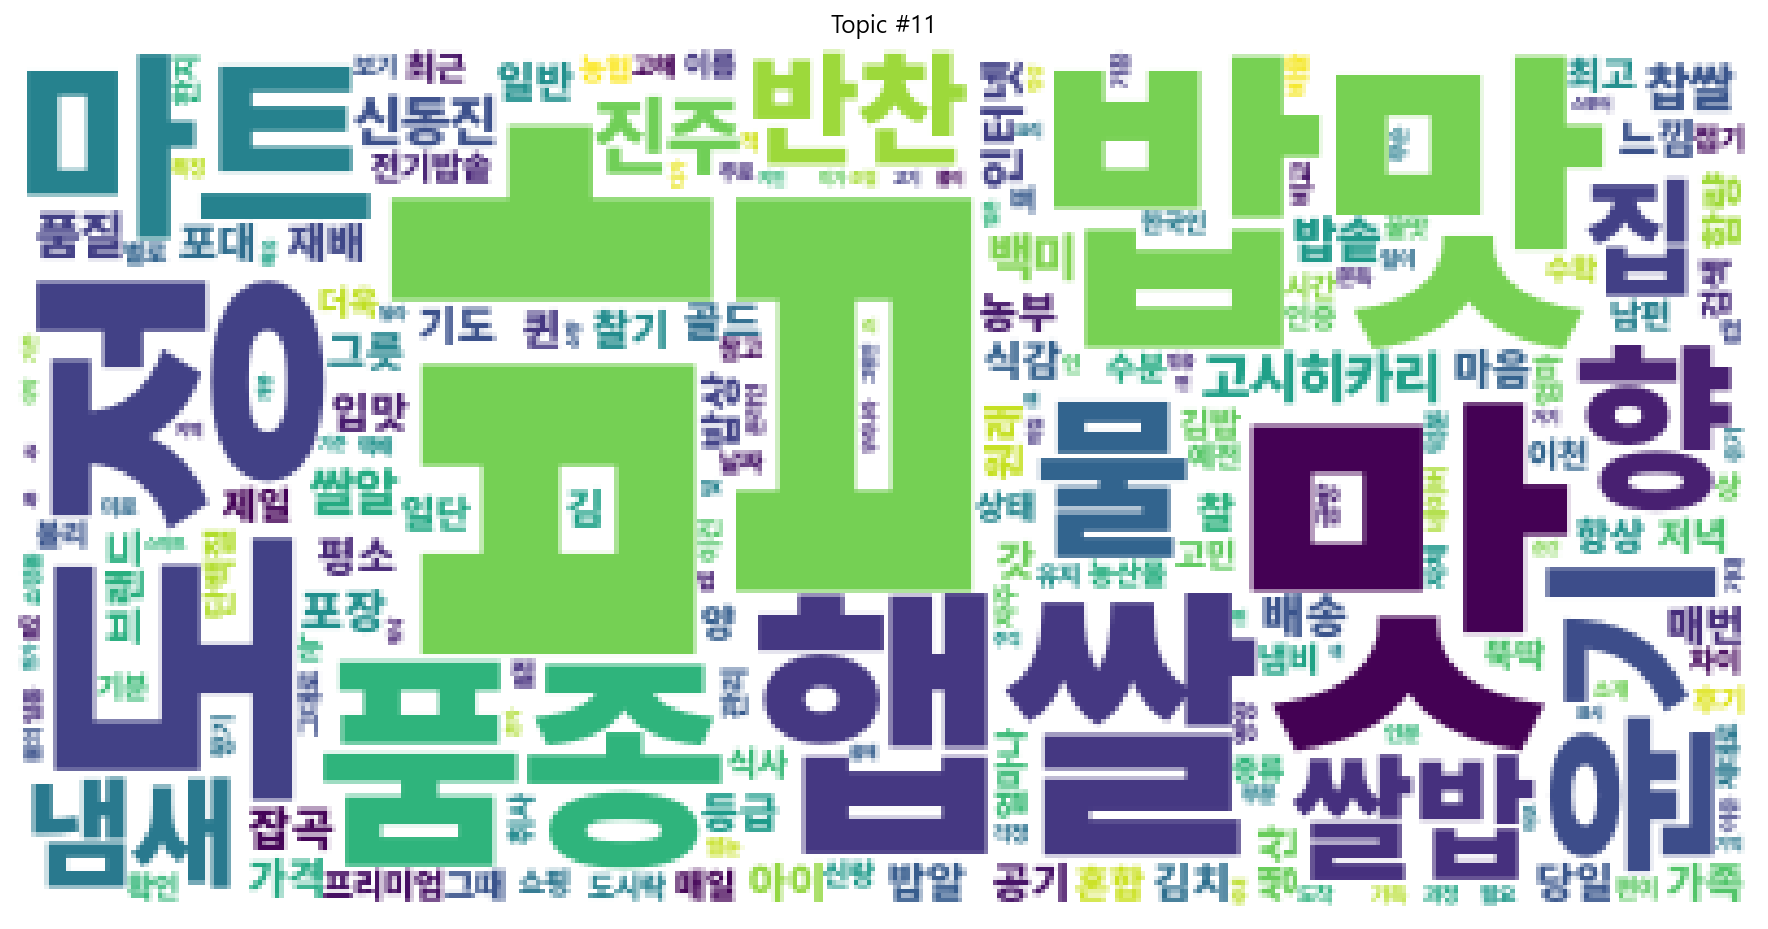

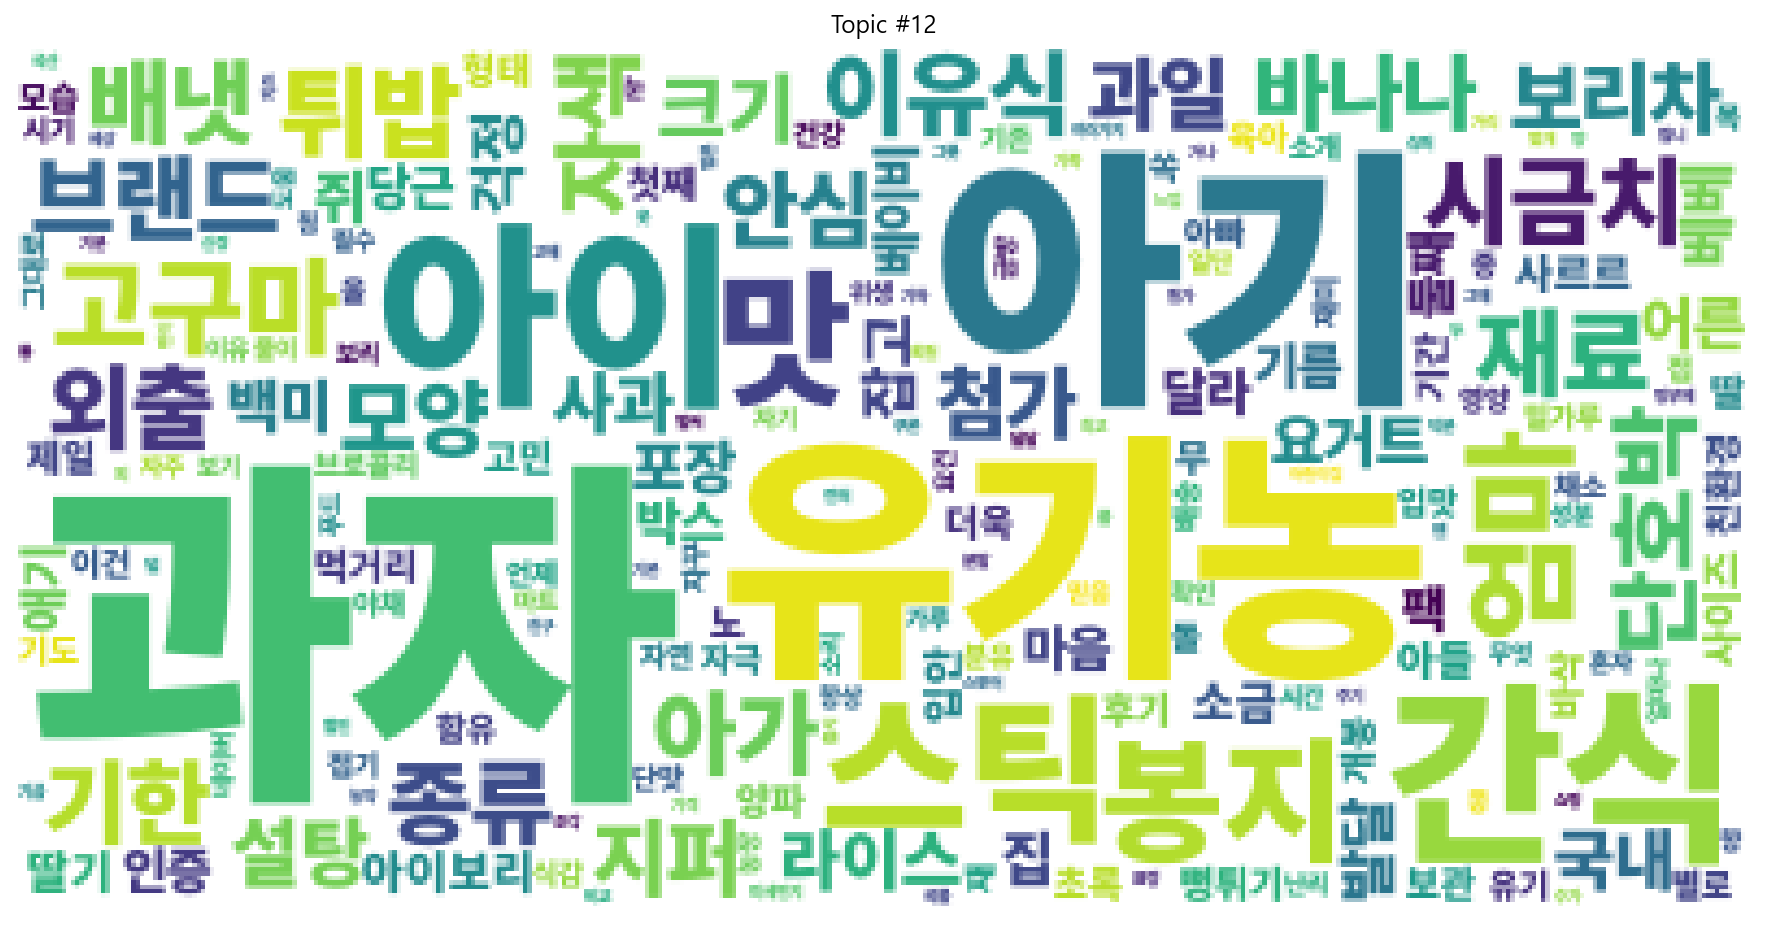

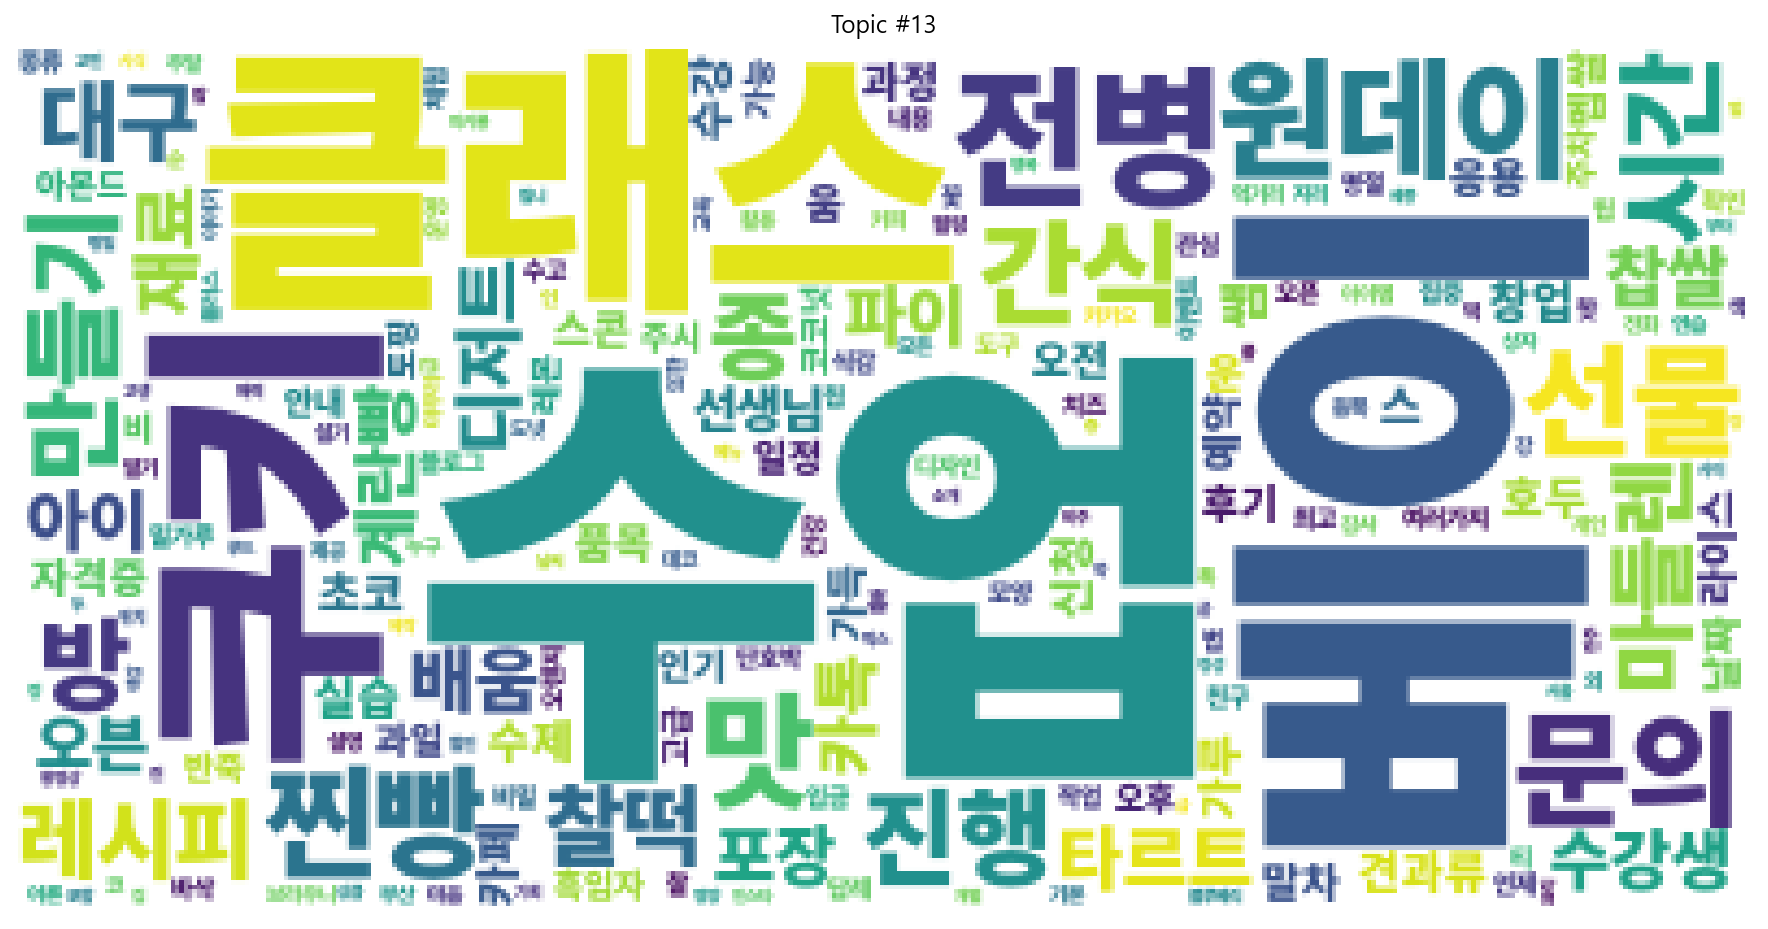

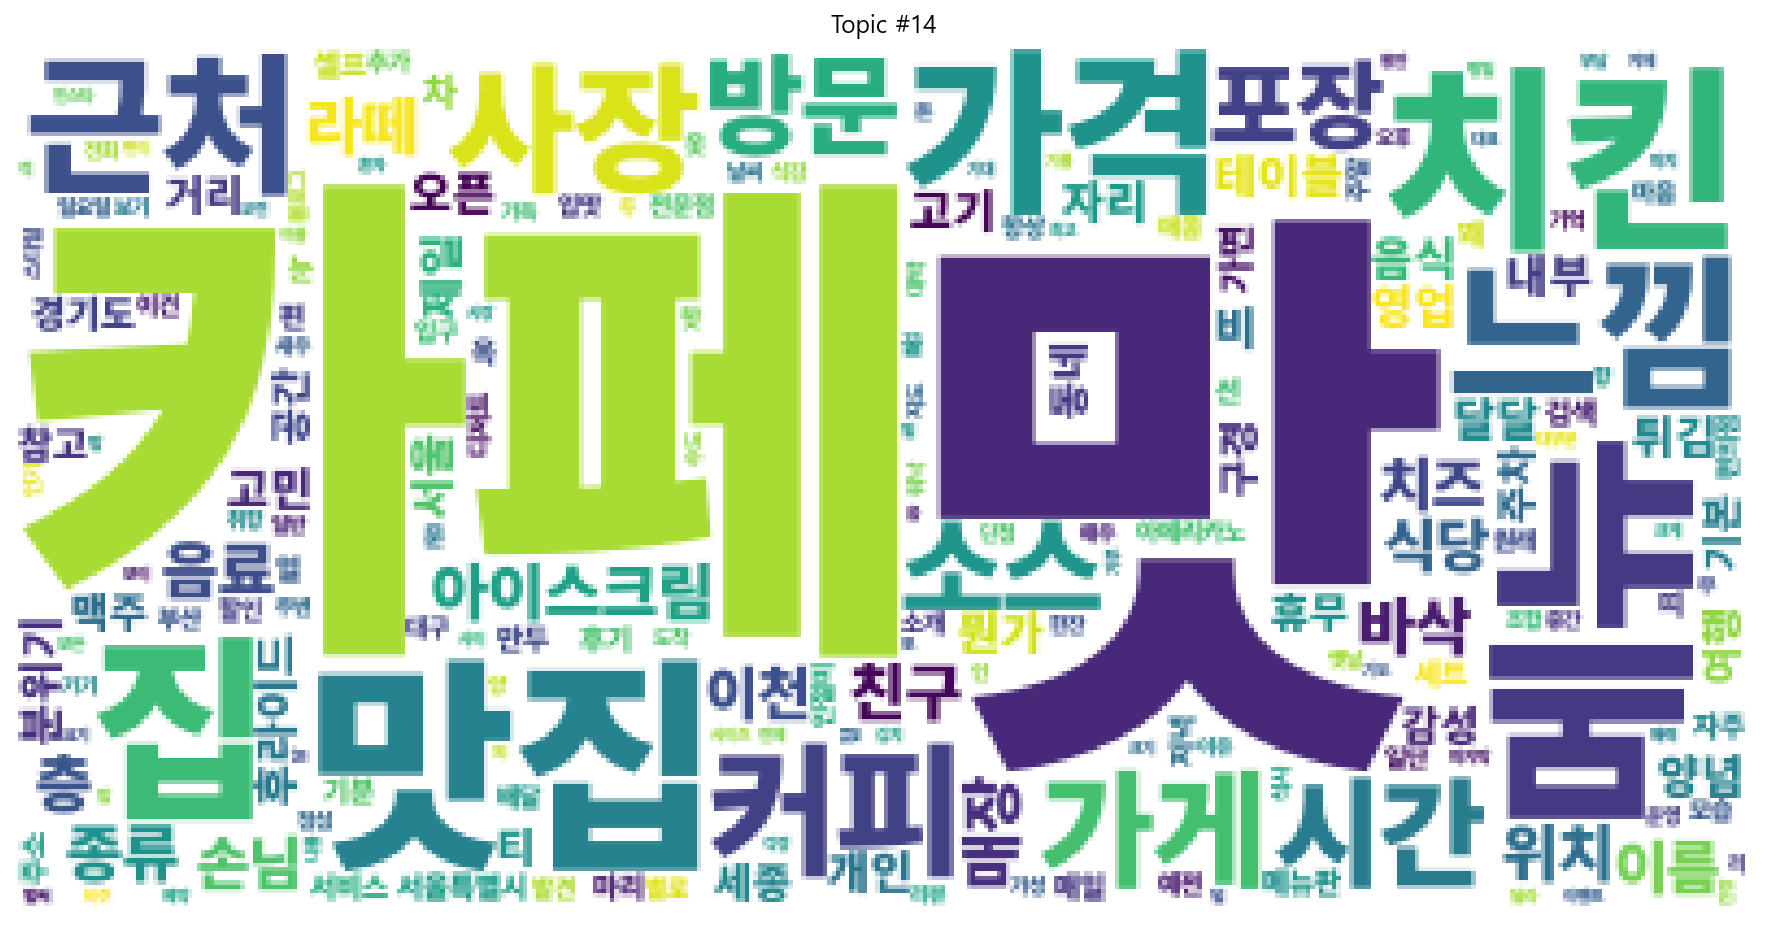

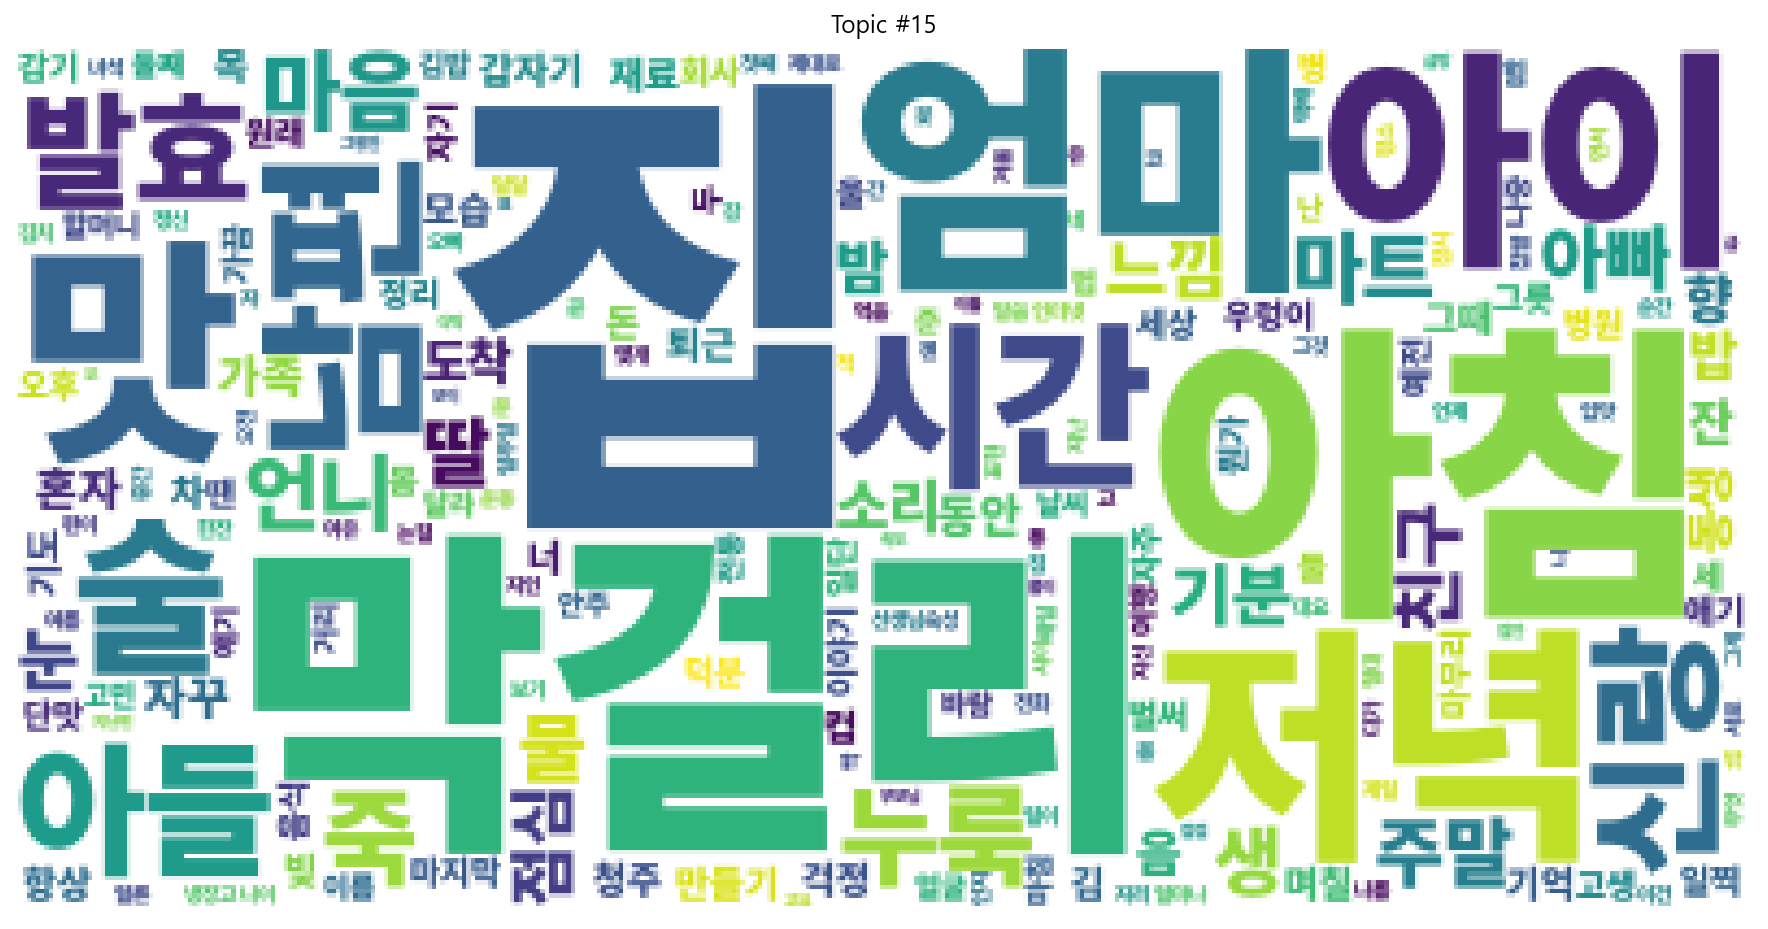

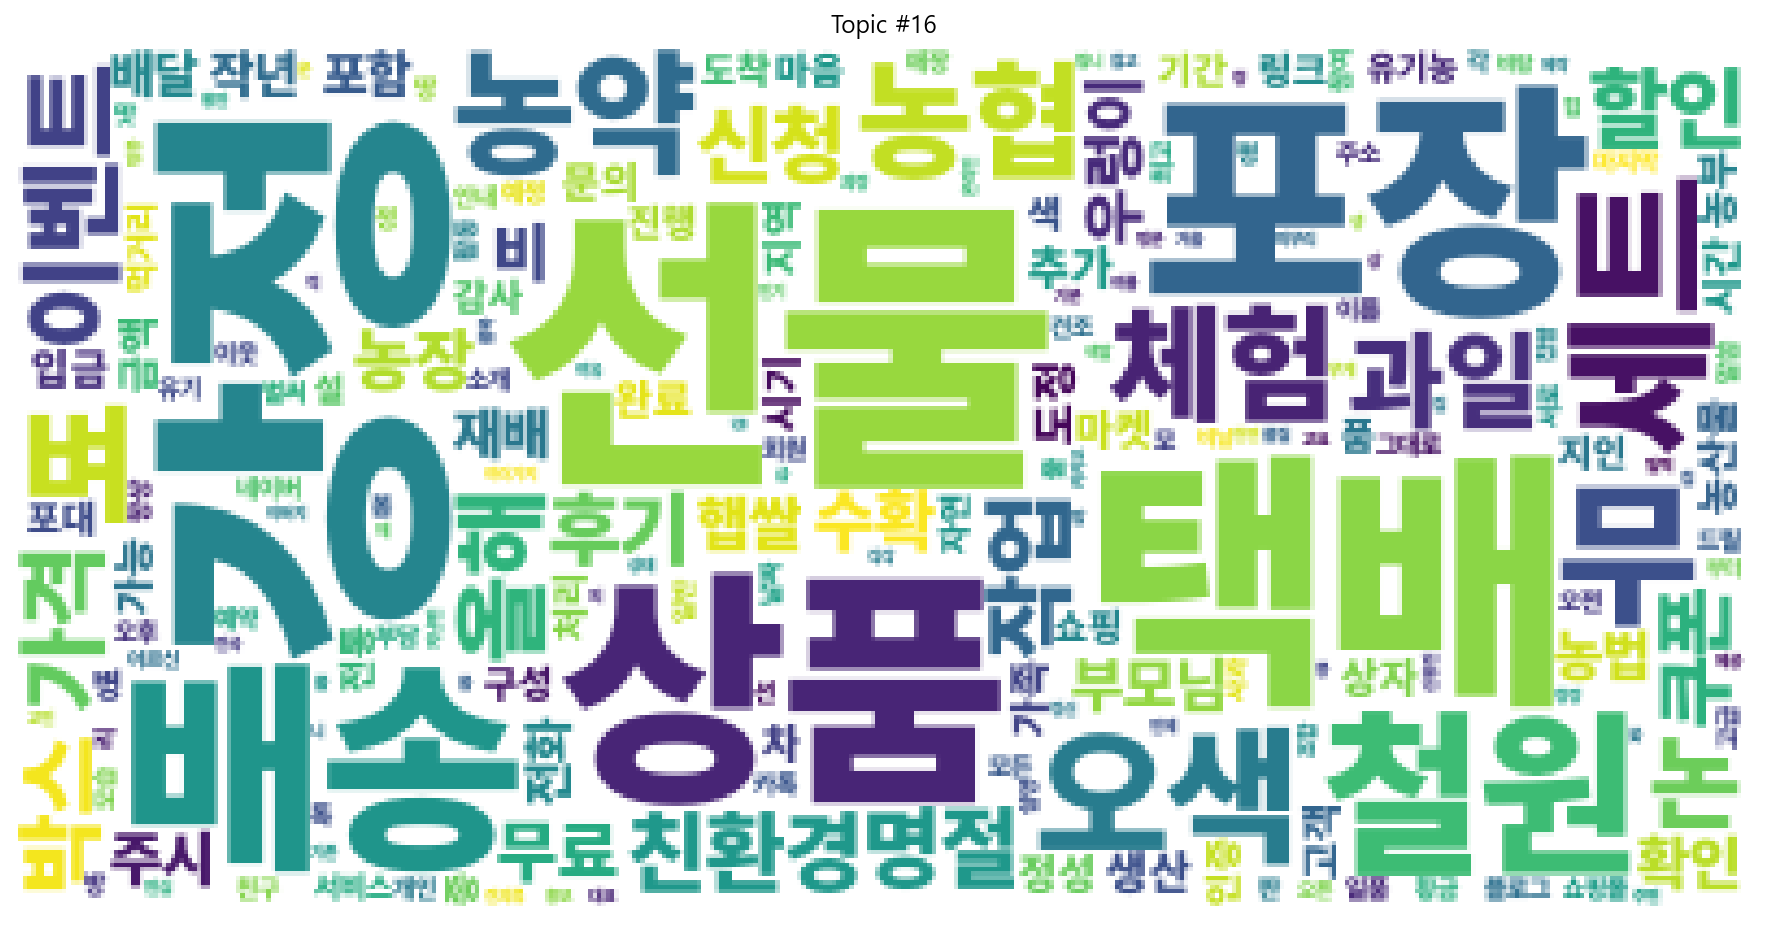

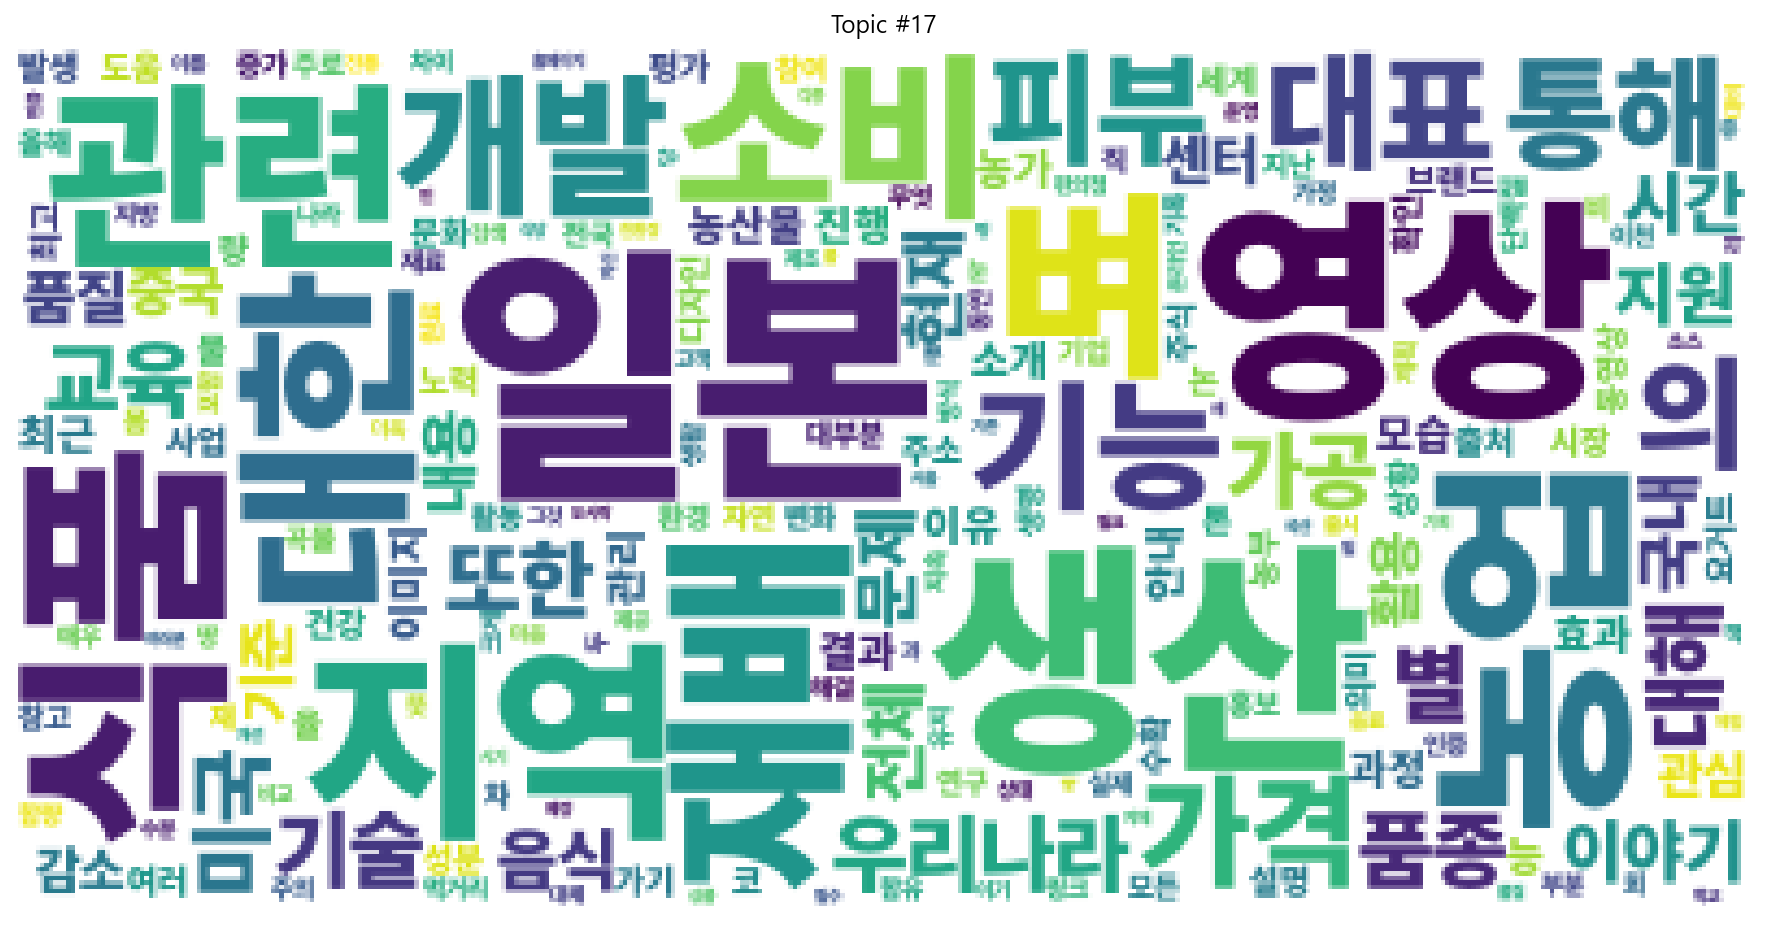

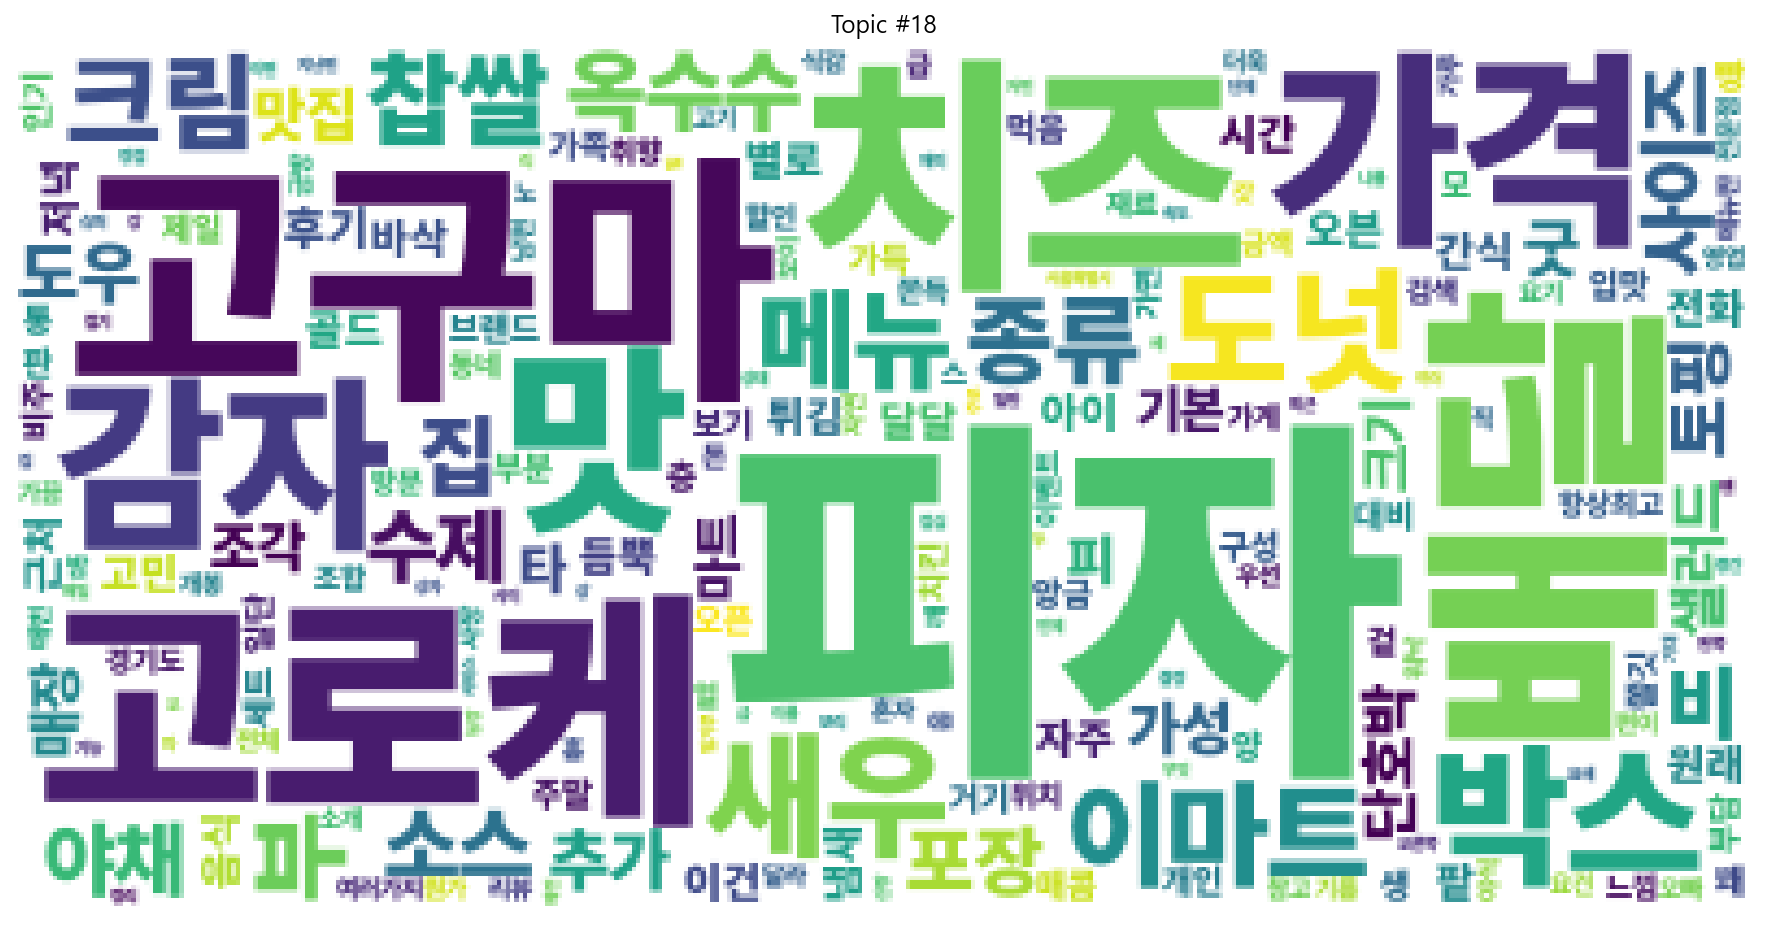

In [68]:
wc = WordCloud(background_color='white',font_path="Pretendard-Black.otf")            # 워드클라우드

plt.figure(figsize=(30,30))
for t in range(lda_model.num_topics):
    # plt.subplot(5,4,t+1)
    x = dict(lda_model.show_topic(t,200))
    im = wc.generate_from_frequencies(x)
    plt.figure(figsize=(16,8))
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t+1))

    plt.savefig('LDA_wordcloud_2019'+str(t+1)+'.png')

In [69]:
doc_per_topic_list = []

for n in range(len(corpus)):
    doc_topic = lda_model[corpus[n]]
    doc_topic = sorted(doc_topic, key=lambda x: (x[1]), reverse=True)
    topic_most_pr = doc_topic[0][0]
    topic_pr = doc_topic[0][1]
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])
    
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])



doc_topic_df = doc_topic_df.join(result_df["text"])  

doc_topic_df

doc_topic_df.groupby('Topic')[['Doc_Num']].count()

,Doc_Num
Topic,
0,1633
1,460
2,585
3,694
4,404
5,728
6,406
7,391
8,2651


In [70]:
doc_topic_df

,Doc_Num,Topic,Percentage,text
0,0,8,0.737532,":: Pocohol Recipe ::\n우리 아이를 위한 첫 요리, 쌀미음 만들기\..."
1,1,0,0.707281,#쌀케이크만들기\n\n\n\n쌀케이크만들기의 기본은\n#제누와즈만들기 !!\n\n#...
2,2,7,0.442087,일본식 소고기카레 만드는법 ⓦ. 전남쌀 10kg\n어릴때는 지금도 때때로 ㅋ \n노...
3,3,6,0.256150,건강요리 강좌에서 쌀누룩으로 다양한 요리를 만들 수 있는 것을 알고\n호기심과 ...
4,4,4,0.510224,"곤약밥\n만드는 법\n#곤약밥\n글, 사진 / 카렌C\n요즘 집에서 식사할 때 먹고..."
...,...,...,...,...
17684,17684,11,0.527777,쌀과자 냠냠 맛있게 먹으며 열심히 즐겁게 공부해봐요~💕
17685,17685,8,0.811109,저울은 준비를 안했어요분유스푼으로 쌀가루 몇그램 나올까요?초기이유식입니다
17686,17686,16,0.404889,*오늘의 최저가 정보롯데 백화점 납품 10kg 쌀등급 상두개 구매 개당 23.7...
17687,17687,11,0.563714,쌀튀밥 두개 (유통기한 2020.3.17)어그 130사이즈(사용감 잇네용)검정 운동...


In [71]:
doc_topic_df.to_excel("2019topic_18.xlsx")